# Structure of ViT model

**Objective:** Understand the structure of the ViT we are working with.

# Importing libraries

In [1]:
import torch
from PIL import Image
import numpy
import sys
from torchvision import transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt

from vit_rollout import VITAttentionRollout
from vit_grad_rollout import VITAttentionGradRollout

/Data/ml_env/miniconda3/envs/venv_ml_env/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Data/ml_env/miniconda3/envs/venv_ml_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading model

In [2]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")

model = torch.hub.load('facebookresearch/deit:main', 
        'deit_tiny_patch16_224', pretrained=True)
model.eval()
model.to(DEVICE)

Using cpu


Using cache found in /users/eleves-a/2018/nicolas.lopes/.cache/torch/hub/facebookresearch_deit_main


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=768, out_features=192, bias=True)
        (drop2): Dropout(p=0.0, inplace=Fals

# Model Structure

In short, the model has three main structures:

- Tokenization + positional embedding
- 12 Transformer Layers
- One fully connected layer for classification

## Tokenization + positional embedding

The model starts by performing an "tokezination" + positional embedding of our image: (check which part adds the position embedding)

In [3]:
'''
(patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
'''

'\n(patch_embed): PatchEmbed(\n    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))\n    (norm): Identity()\n  )\n'

## Transformer Layers

Basically the model is a sequence of **12** transformer blocks that are **the same**. Here is a structure of a transformer head:

Obs: Most likely, the (attn_drop) with p = 0 has only the intention of getting the attention layer.

In [4]:
'''
(8): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=768, out_features=192, bias=True)
        (drop2): Dropout(p=0.0, inplace=False)
      )
      (ls2): Identity()
      (drop_path2): Identity()
    )
'''

"\n(8): Block(\n      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)\n      (attn): Attention(\n        (qkv): Linear(in_features=192, out_features=576, bias=True)\n        (attn_drop): Dropout(p=0.0, inplace=False)\n        (proj): Linear(in_features=192, out_features=192, bias=True)\n        (proj_drop): Dropout(p=0.0, inplace=False)\n      )\n      (ls1): Identity()\n      (drop_path1): Identity()\n      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)\n      (mlp): Mlp(\n        (fc1): Linear(in_features=192, out_features=768, bias=True)\n        (act): GELU(approximate='none')\n        (drop1): Dropout(p=0.0, inplace=False)\n        (fc2): Linear(in_features=768, out_features=192, bias=True)\n        (drop2): Dropout(p=0.0, inplace=False)\n      )\n      (ls2): Identity()\n      (drop_path2): Identity()\n    )\n"

## Fully connected layer for classification

Finally at the end we have only a fully connected layer for classification

In [5]:
'''
(norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
  (fc_norm): Identity()
  (head): Linear(in_features=192, out_features=1000, bias=True)
'''

'\n(norm): LayerNorm((192,), eps=1e-06, elementwise_affine=True)\n  (fc_norm): Identity()\n  (head): Linear(in_features=192, out_features=1000, bias=True)\n'

In [6]:
model

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=192, out_features=576, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=192, out_features=192, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=192, out_features=768, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (fc2): Linear(in_features=768, out_features=192, bias=True)
        (drop2): Dropout(p=0.0, inplace=Fals

In [13]:
import torch
from PIL import Image
import numpy
import sys
from torchvision import transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt

from vit_rollout import VITAttentionRollout
from vit_grad_rollout import VITAttentionGradRollout

img = Image.open("examples/input.png")

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")

IMAGE_SIZE = 224
DISCARD_RATIO = 0.9

def preprocess_image(image_path, transform):
    img = Image.open(image_path)
    input_tensor = transform(img).unsqueeze(0)
    return input_tensor.to(DEVICE)

def show_mask_on_image(img, mask):
    img = np.float32(img) / 255
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return np.uint8(255 * cam)

transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

model2 = torch.nn.Conv2d(3,192, kernel_size=(16,16), stride=16).to(DEVICE)


Using cuda


In [14]:
input_tensor  = preprocess_image("examples/input.png", transform).to(DEVICE)


a = model2(input_tensor)

In [15]:
a.shape

torch.Size([1, 192, 14, 14])

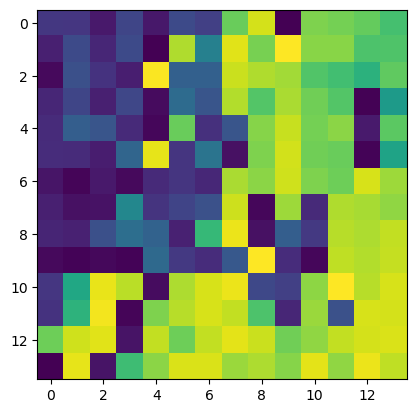

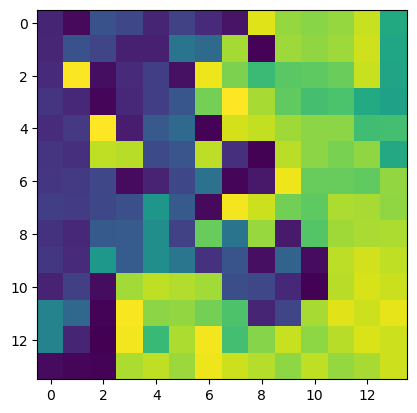

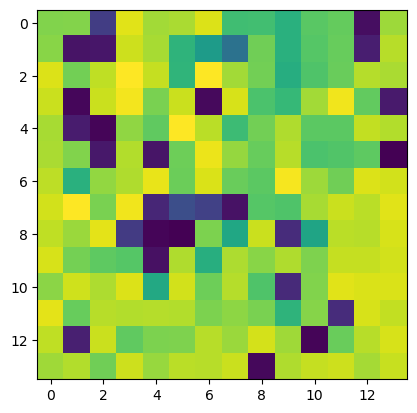

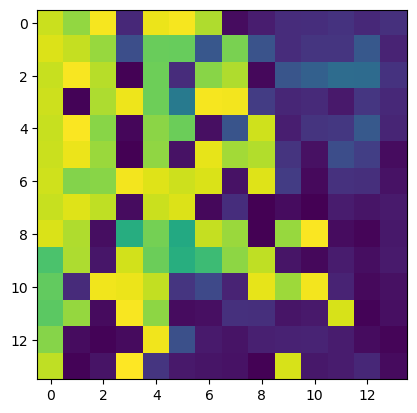

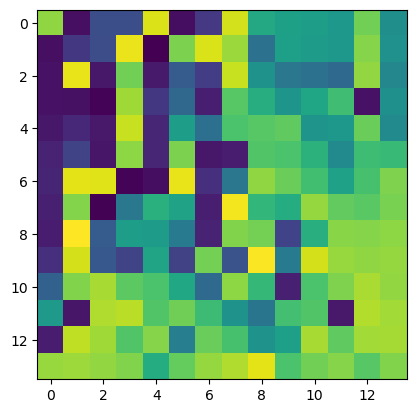

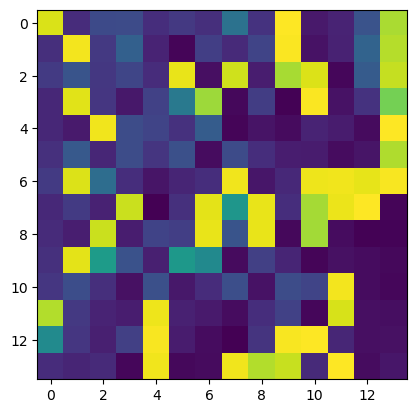

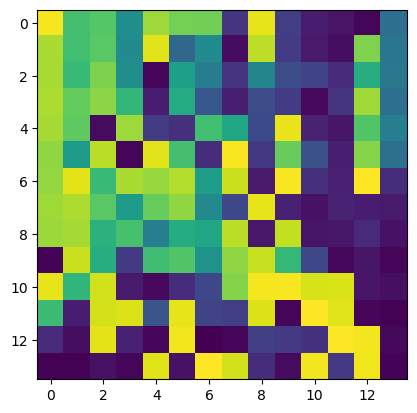

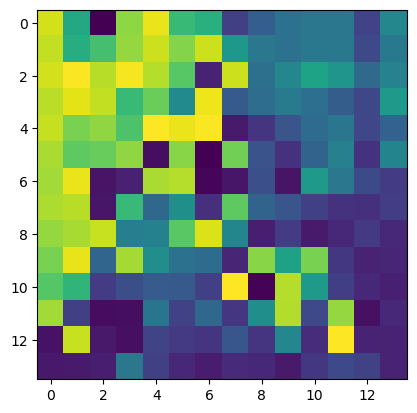

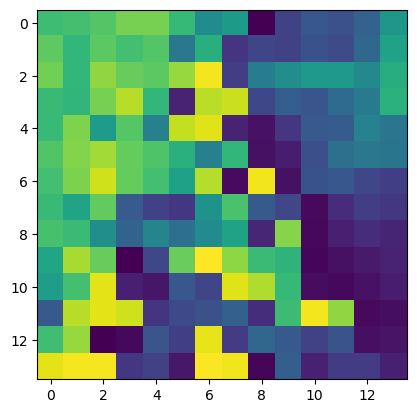

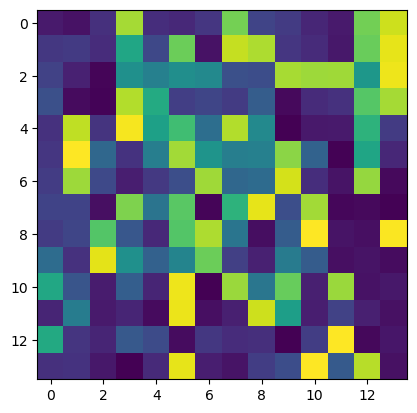

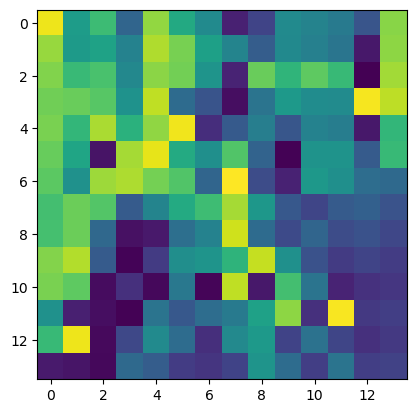

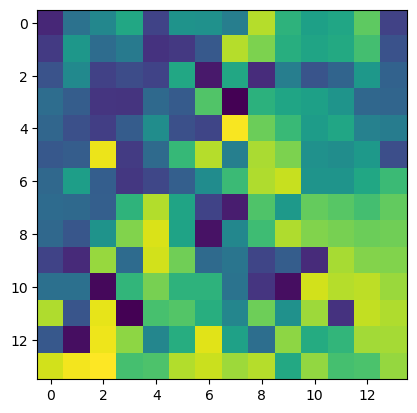

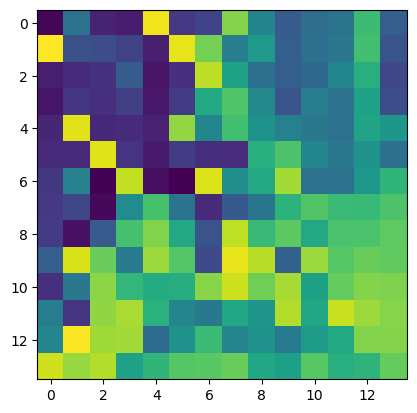

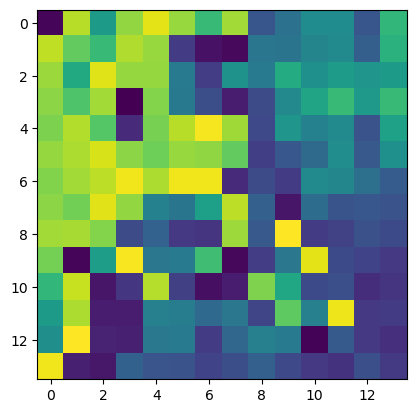

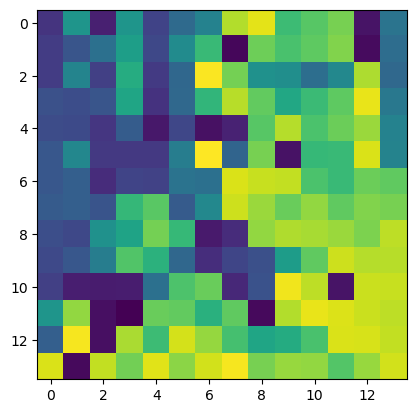

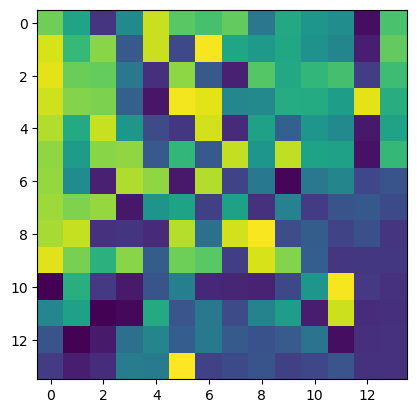

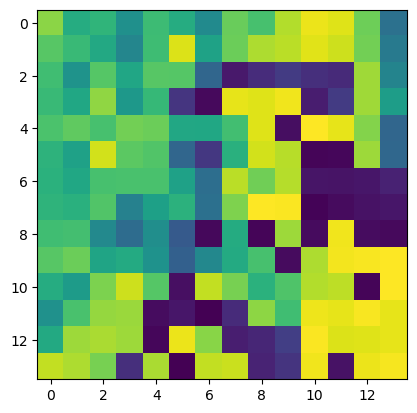

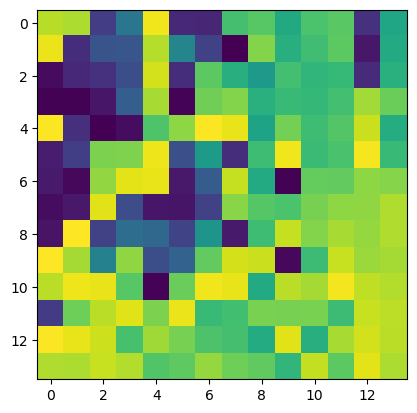

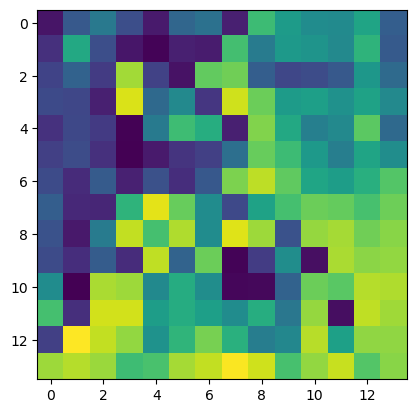

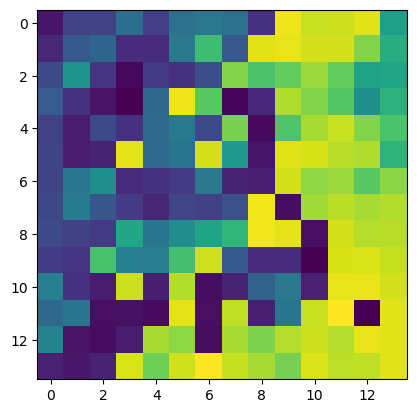

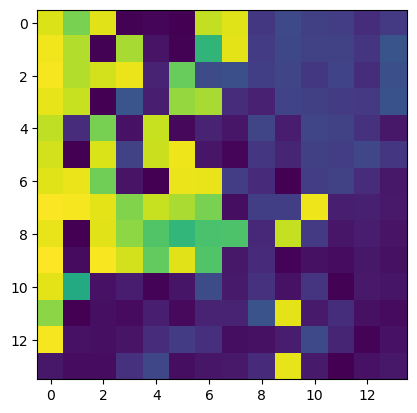

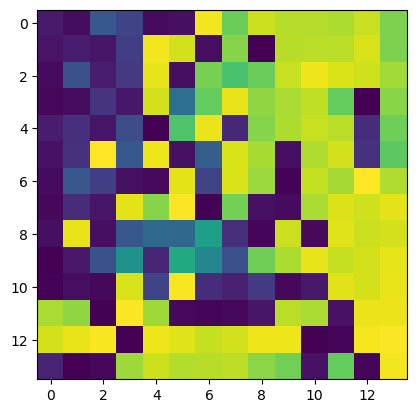

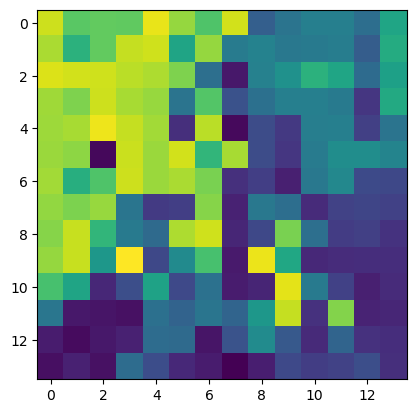

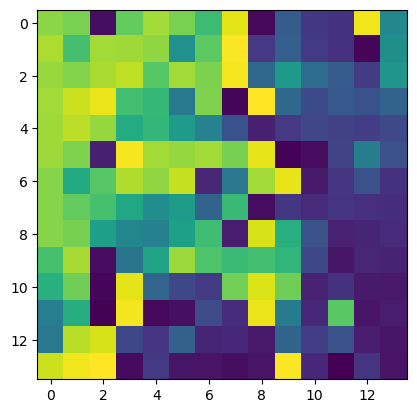

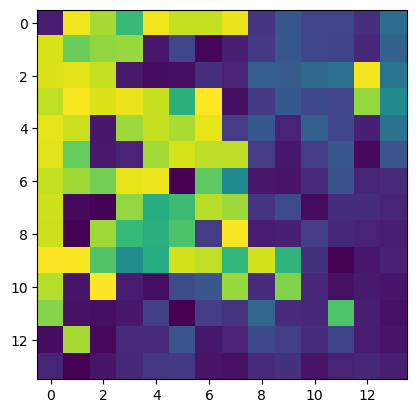

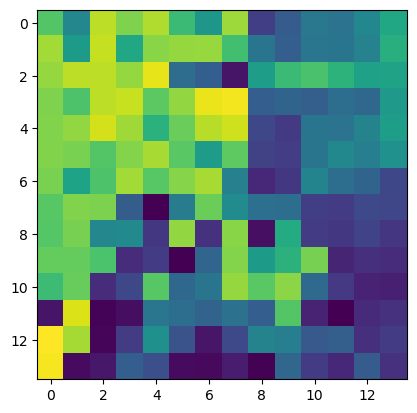

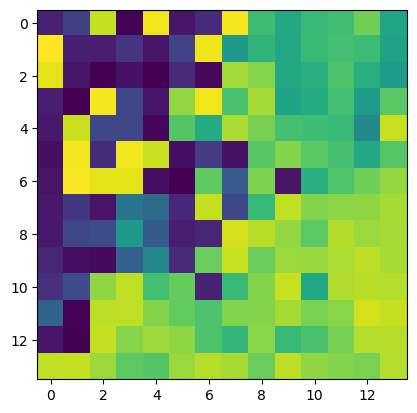

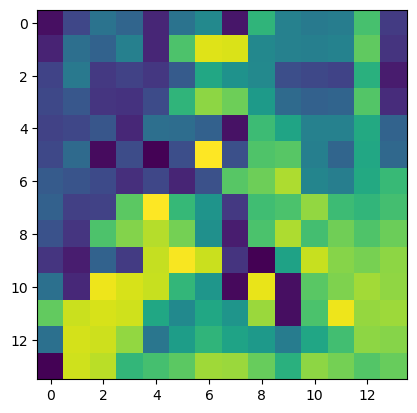

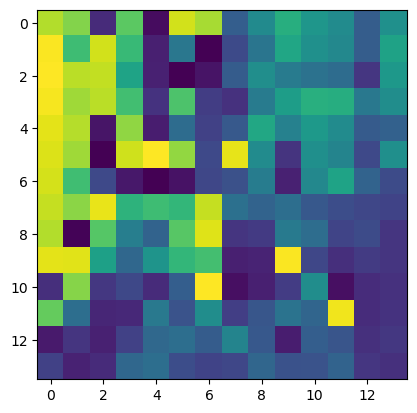

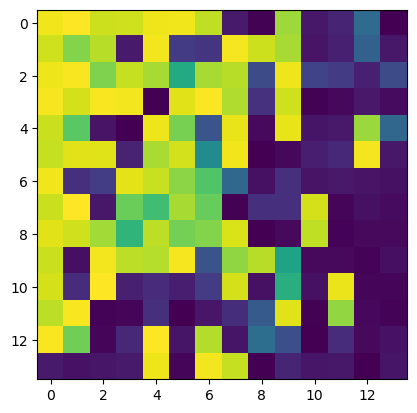

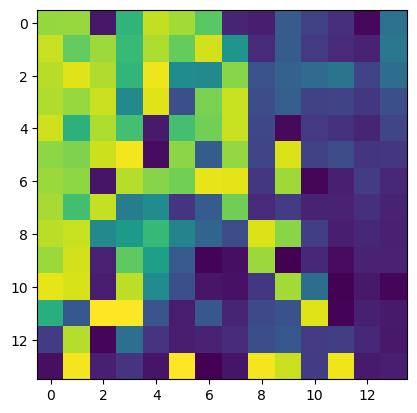

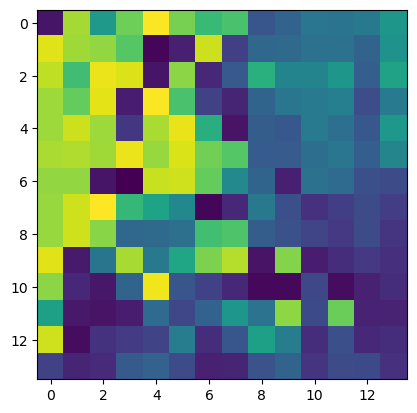

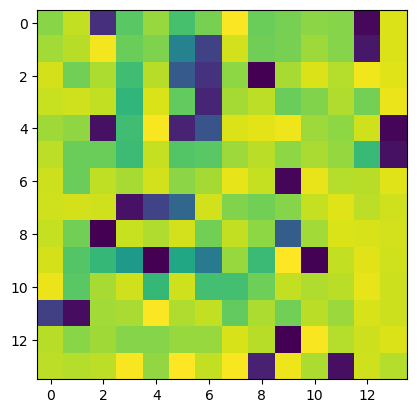

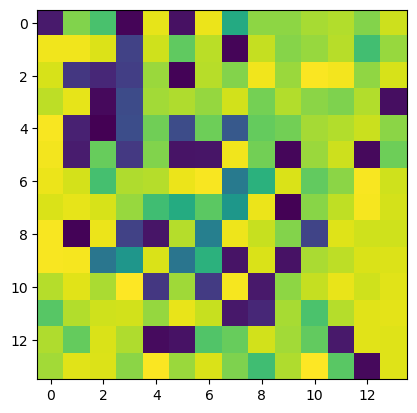

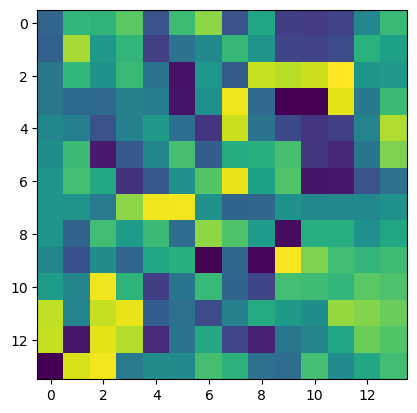

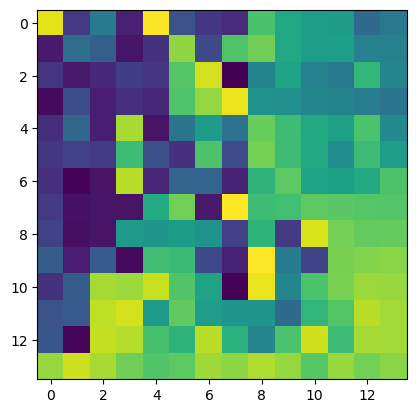

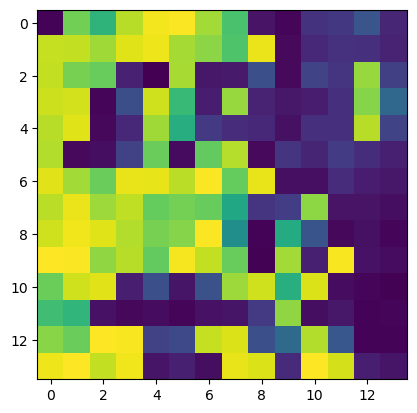

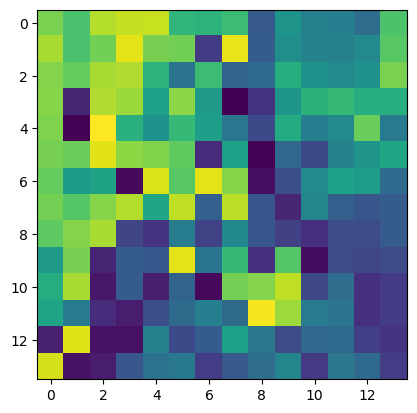

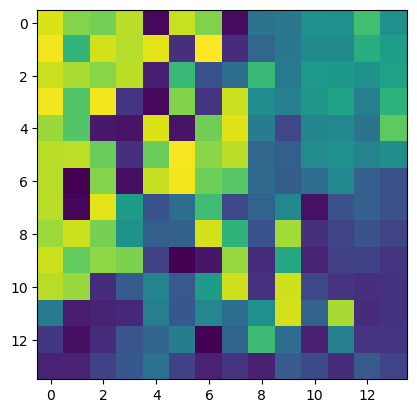

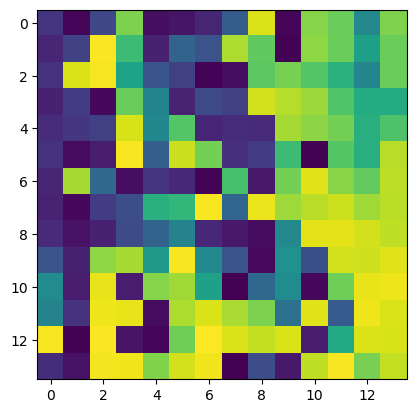

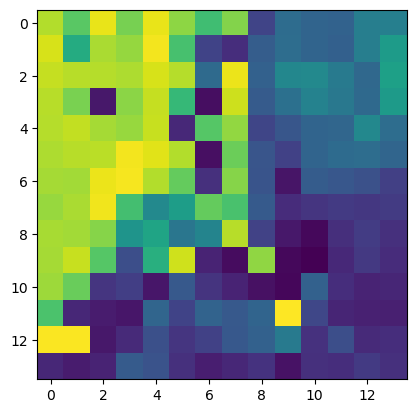

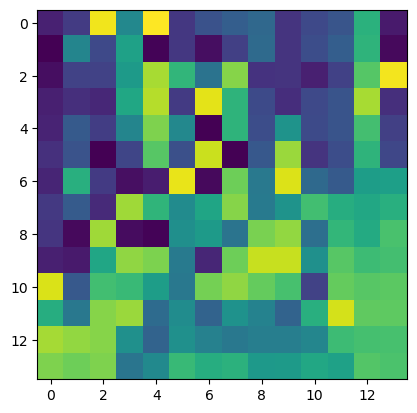

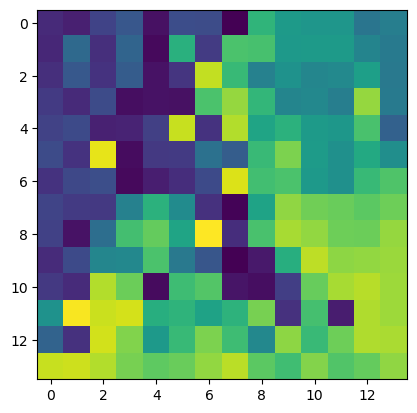

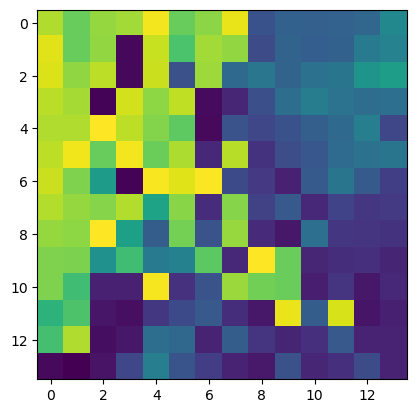

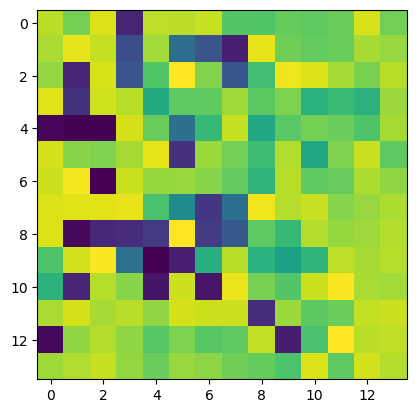

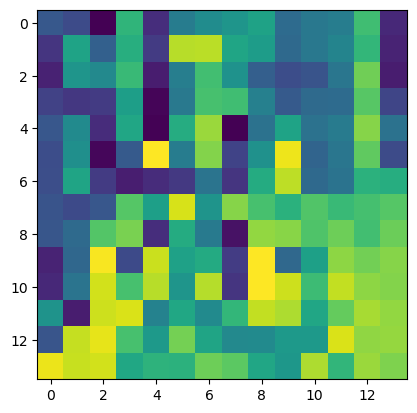

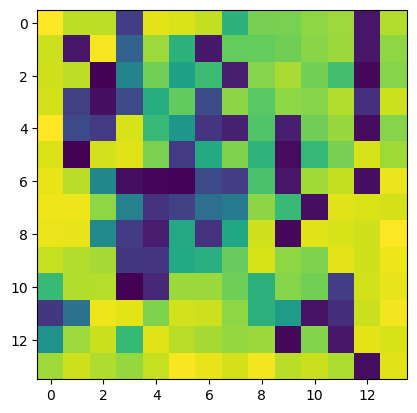

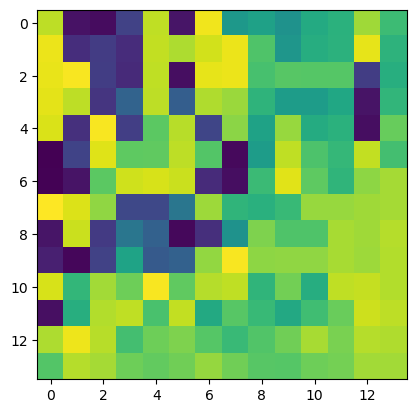

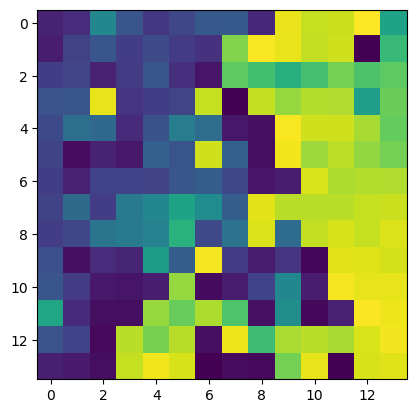

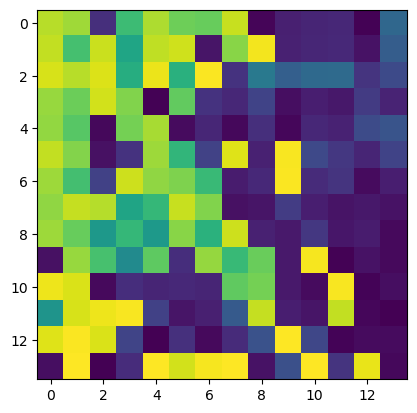

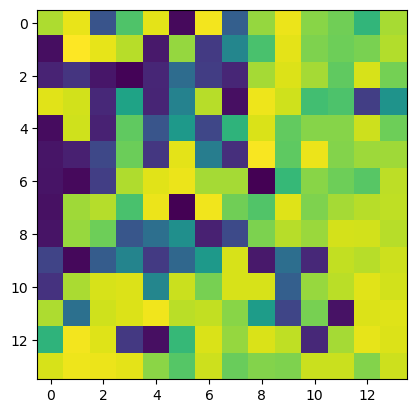

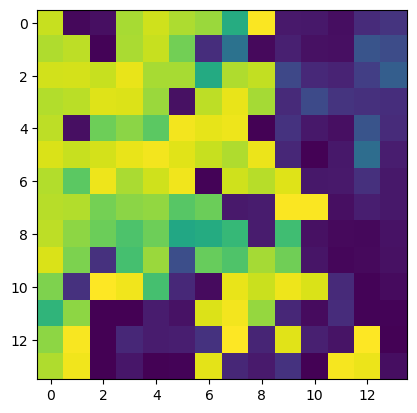

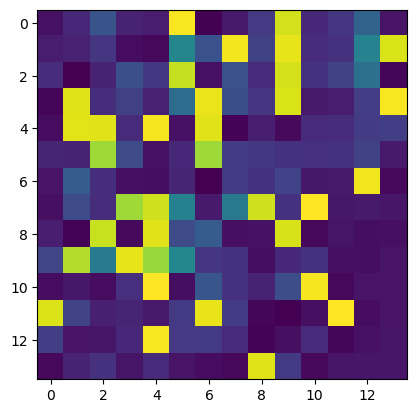

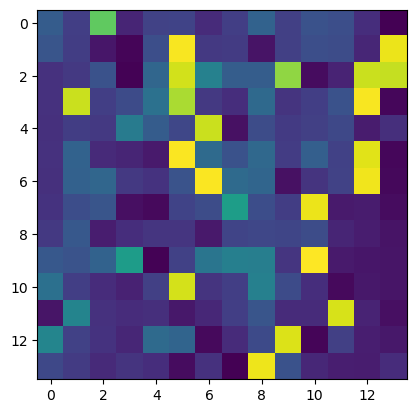

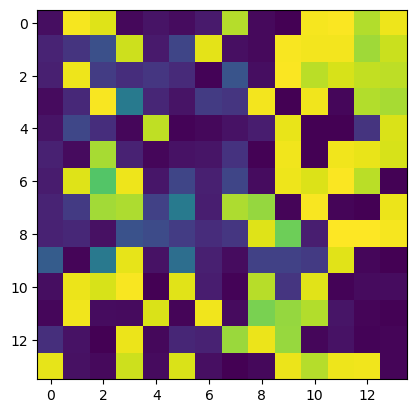

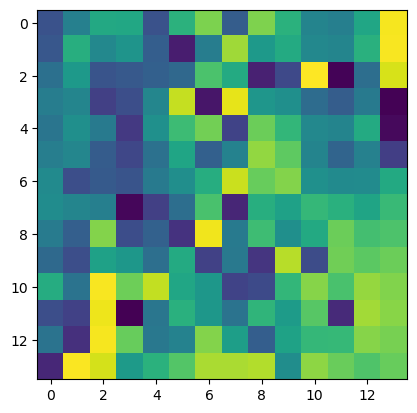

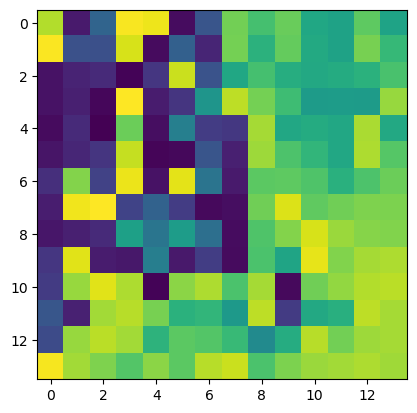

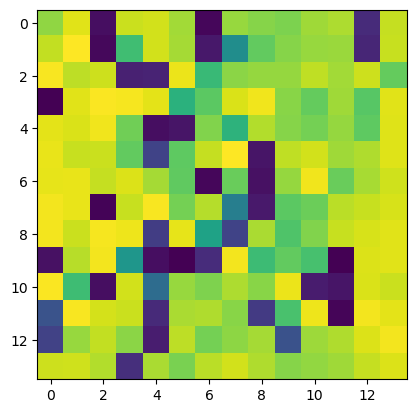

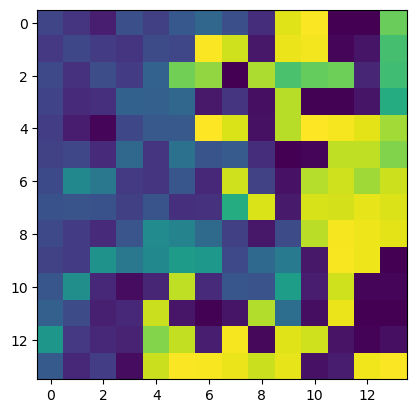

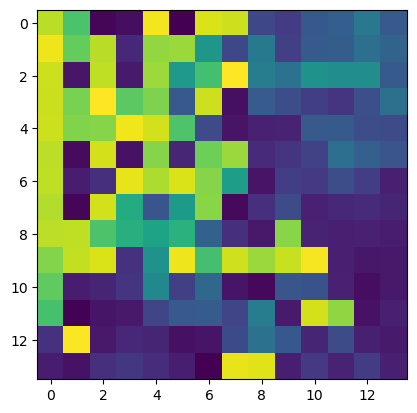

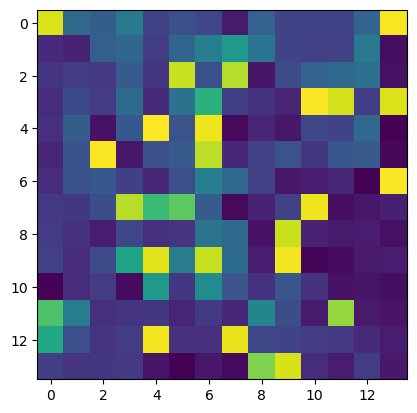

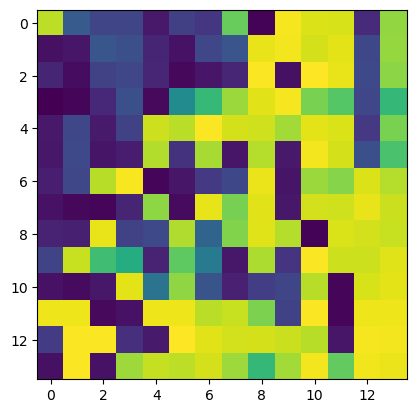

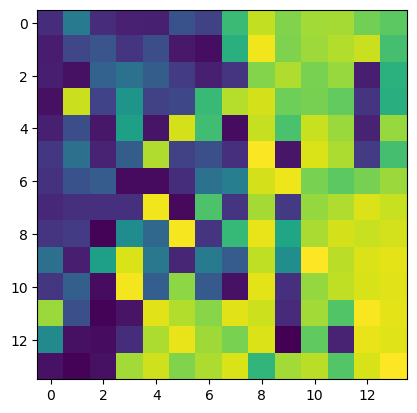

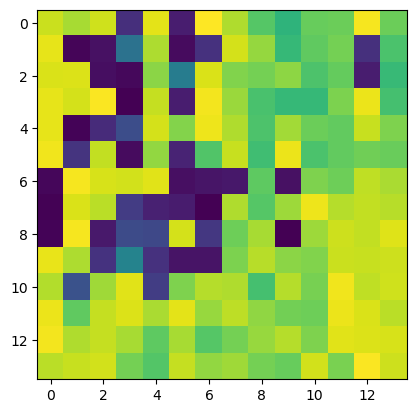

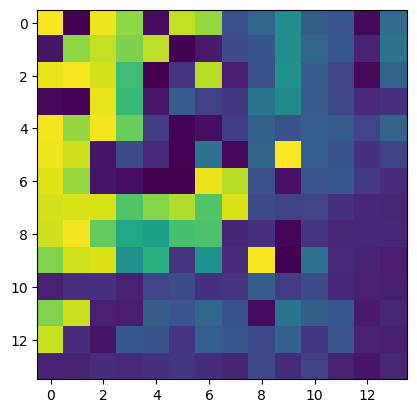

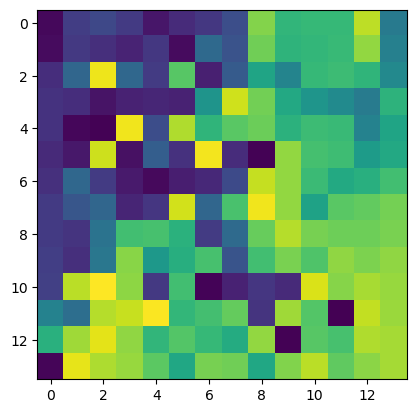

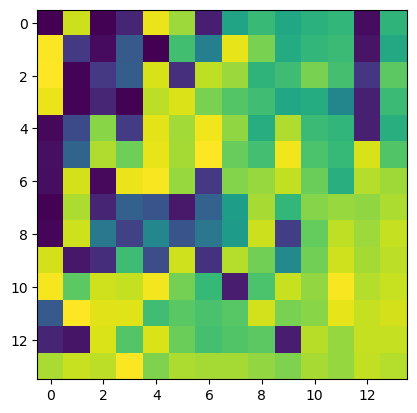

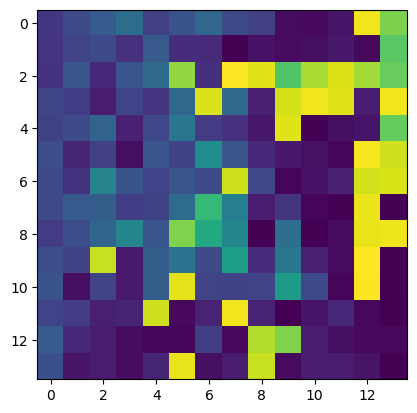

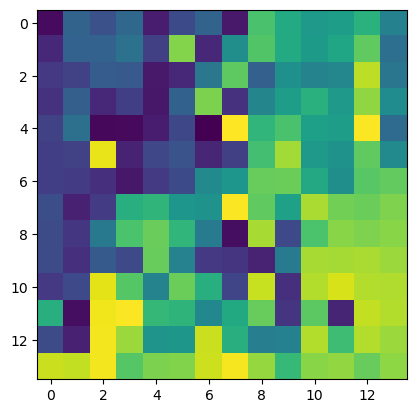

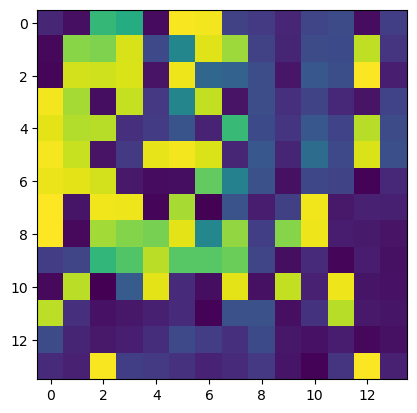

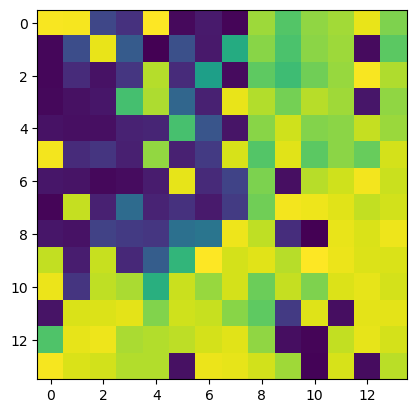

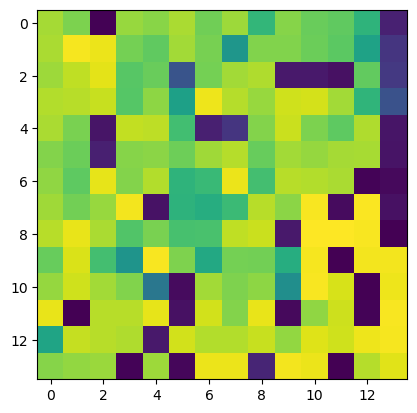

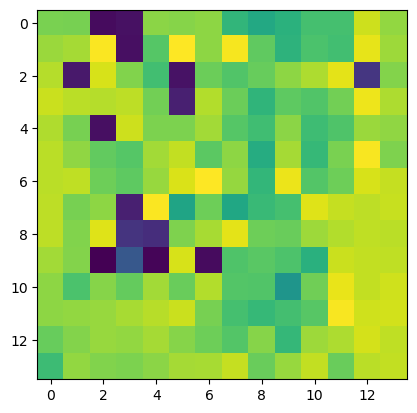

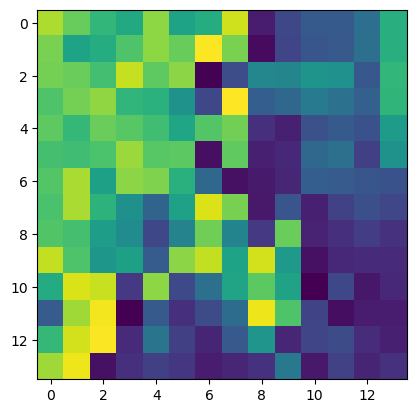

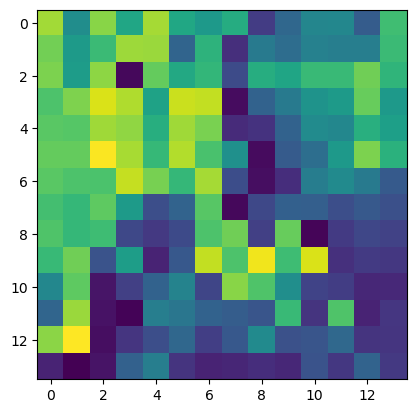

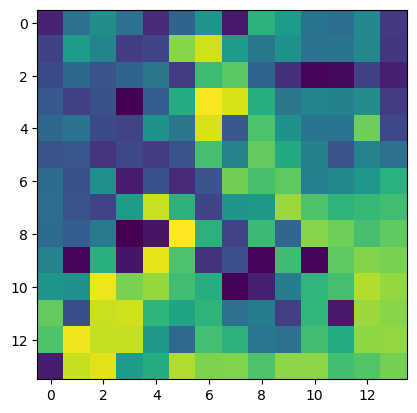

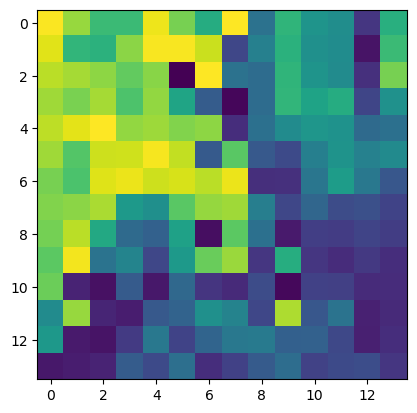

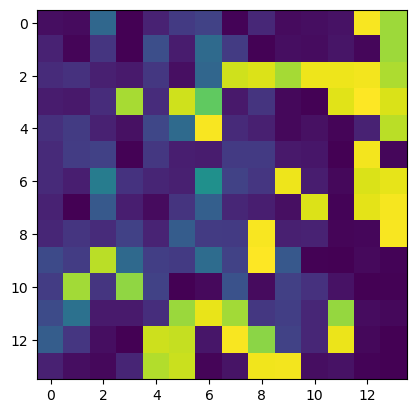

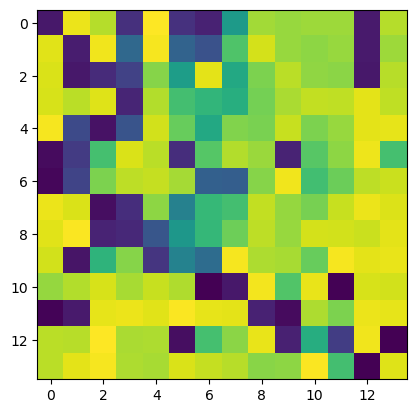

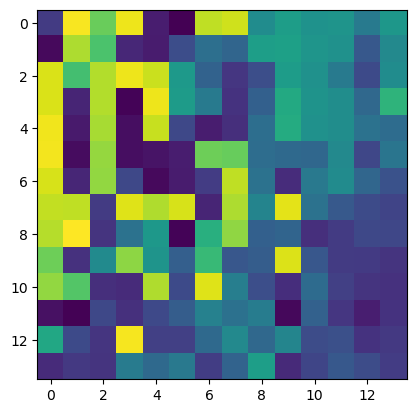

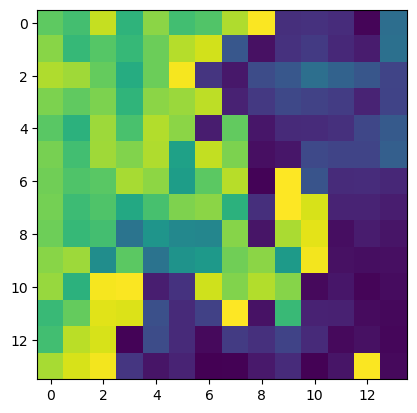

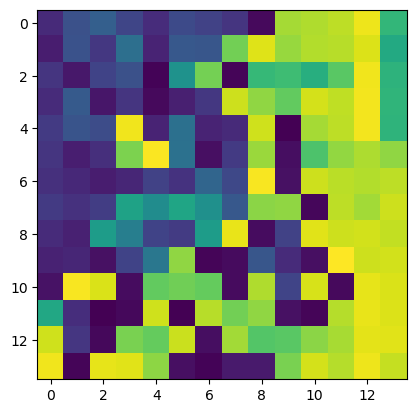

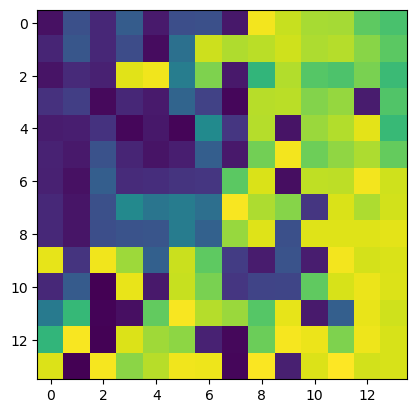

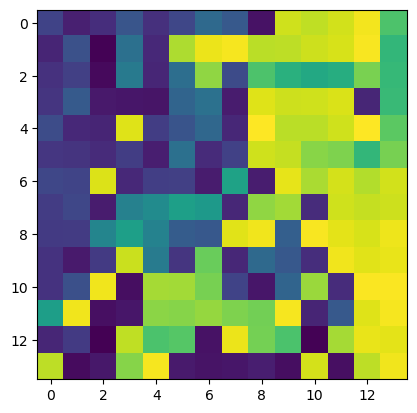

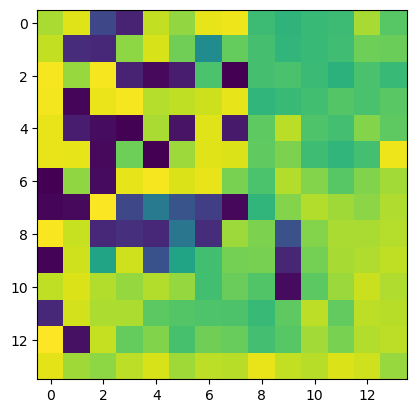

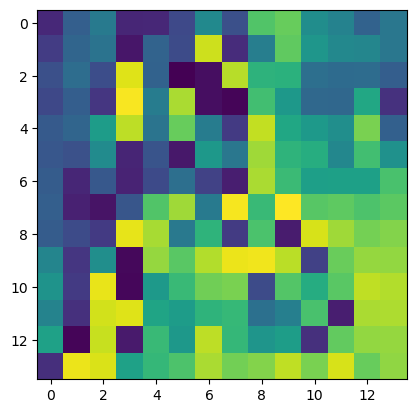

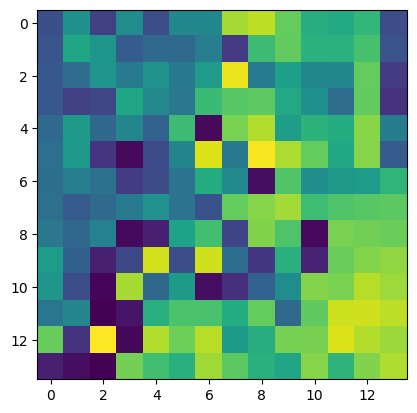

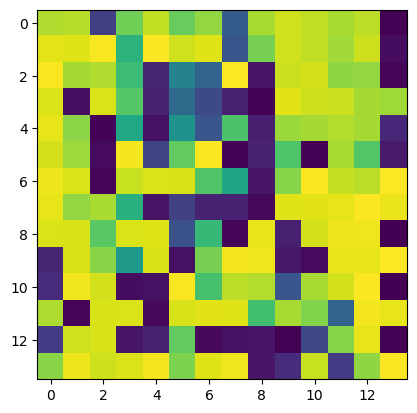

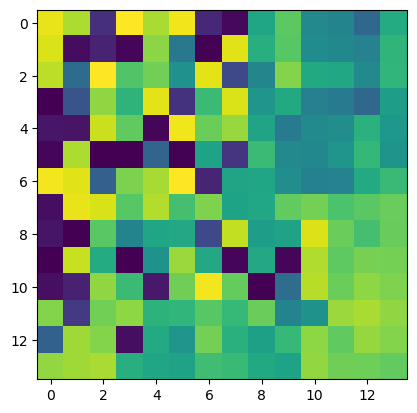

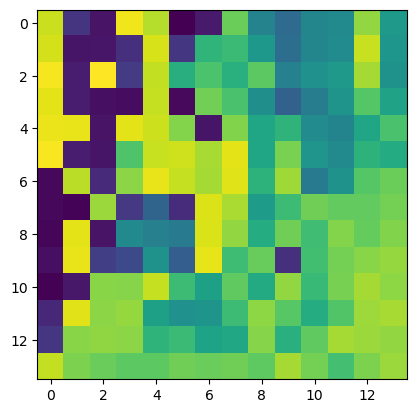

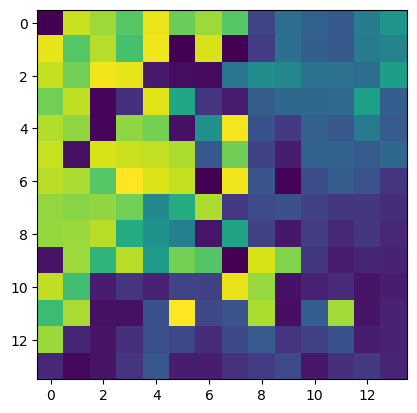

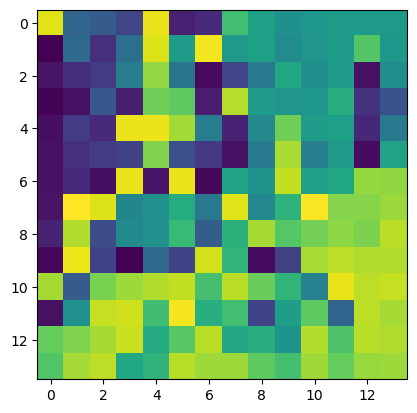

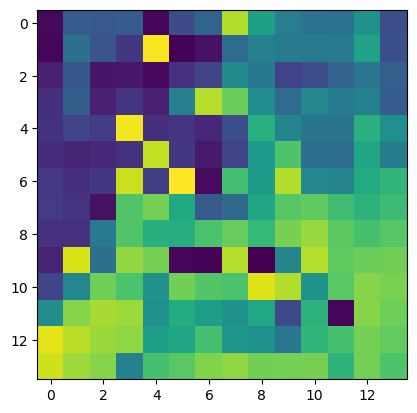

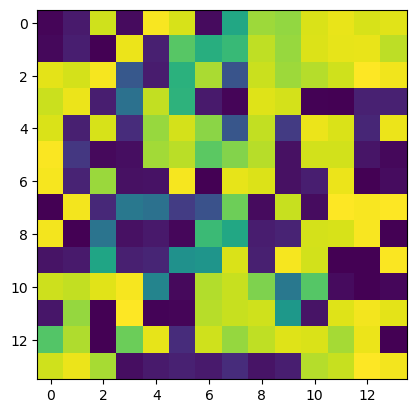

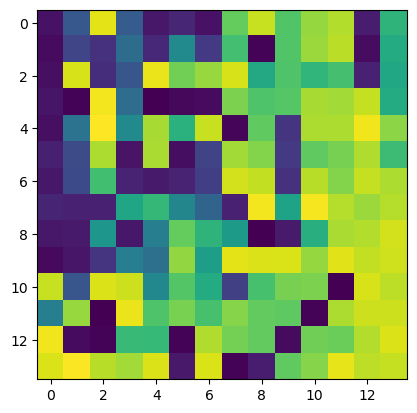

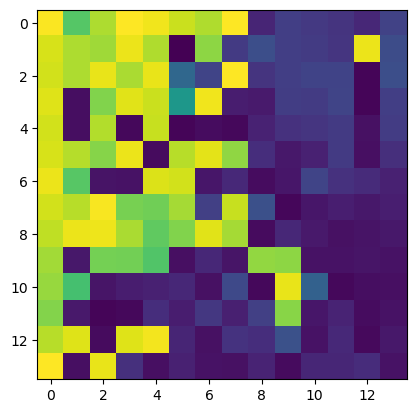

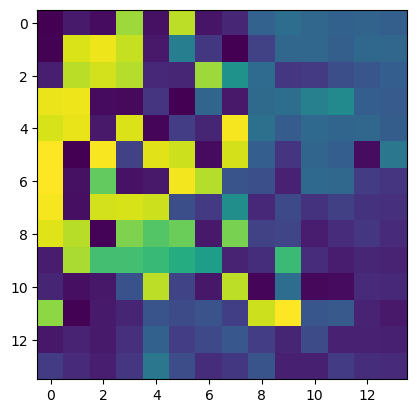

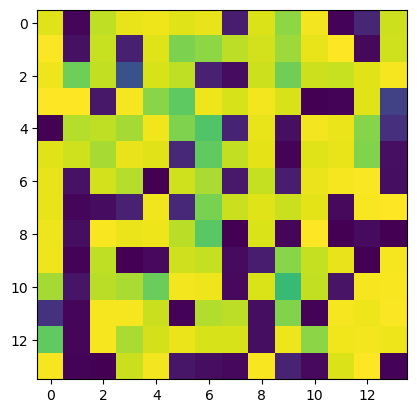

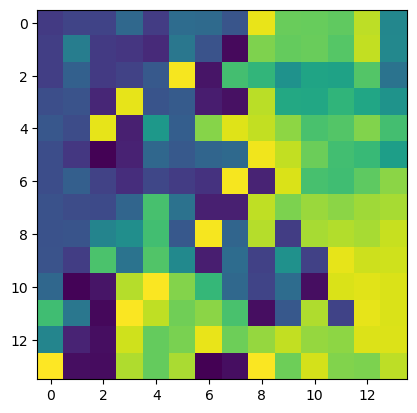

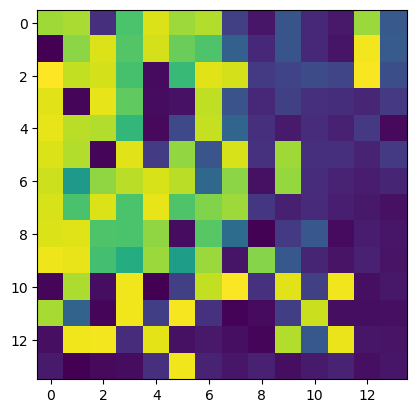

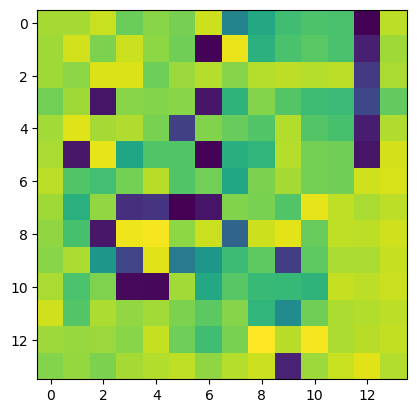

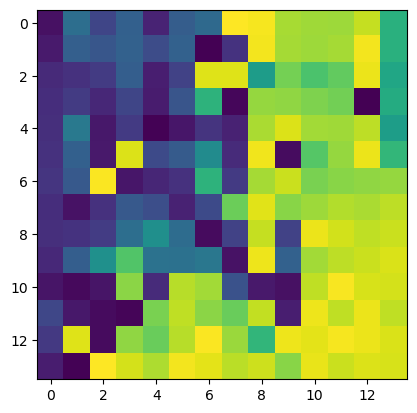

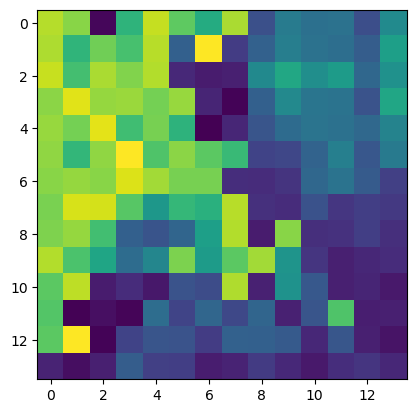

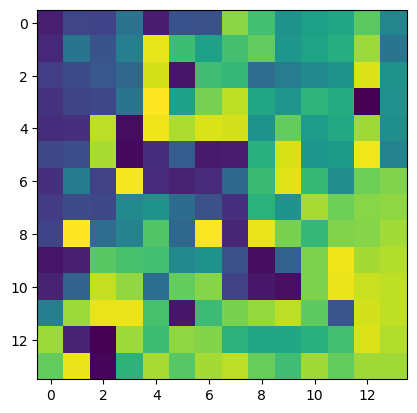

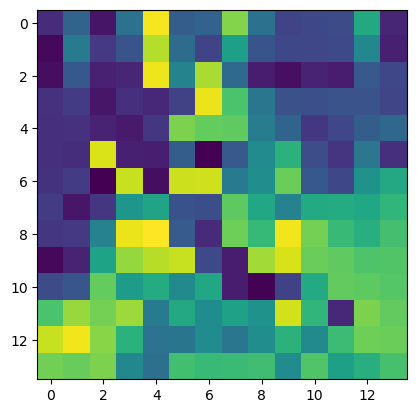

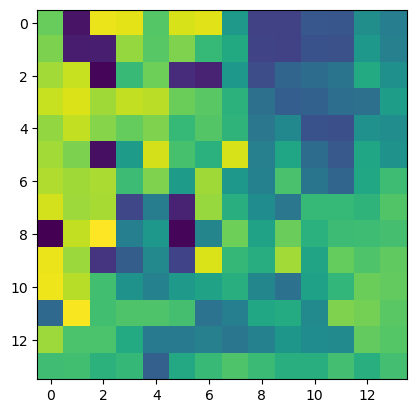

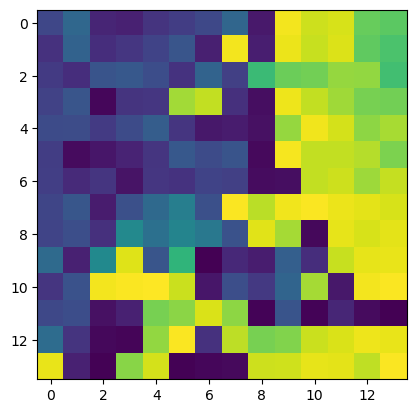

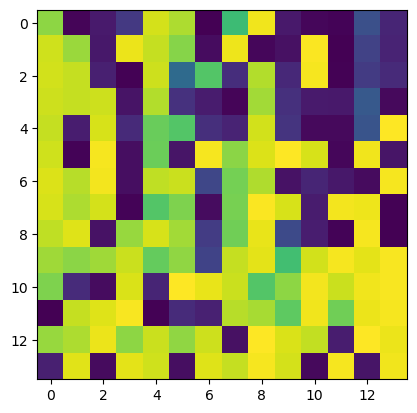

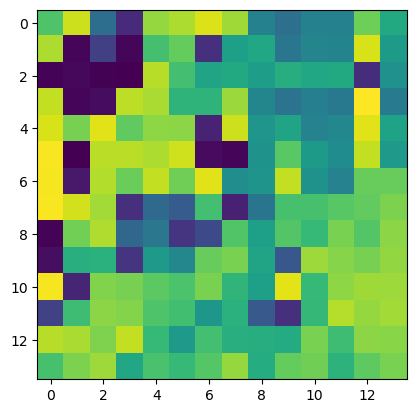

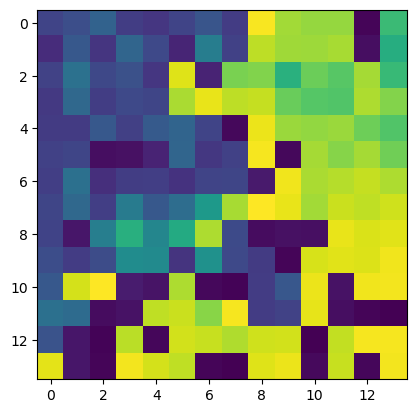

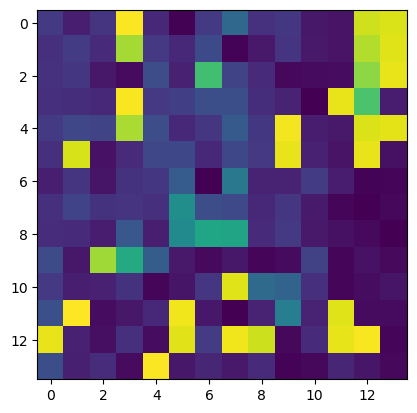

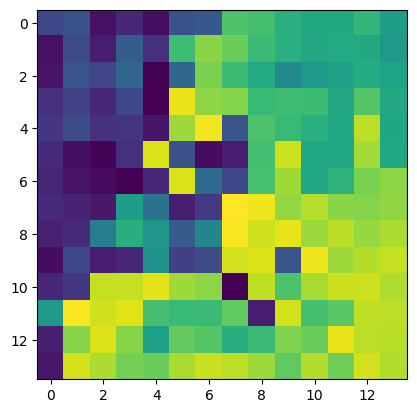

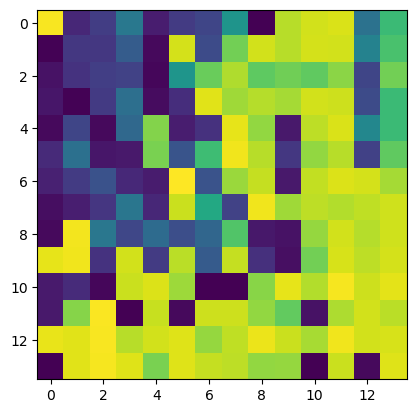

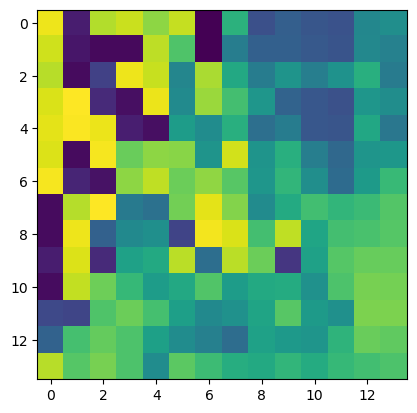

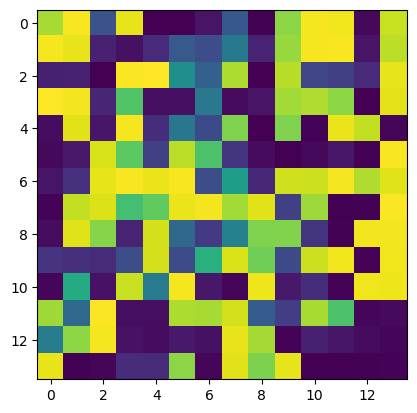

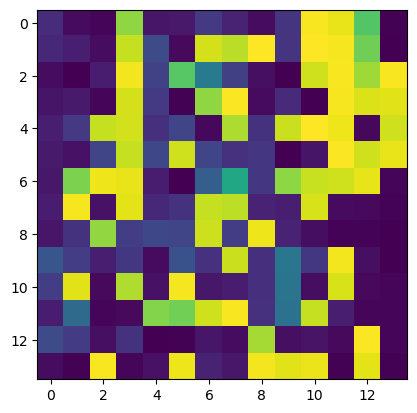

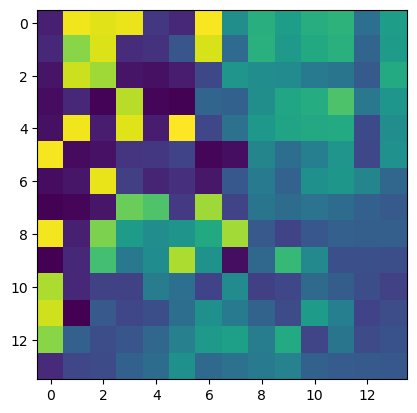

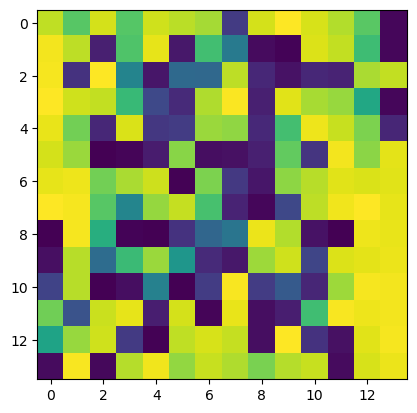

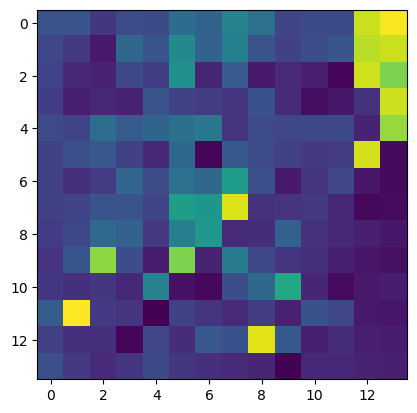

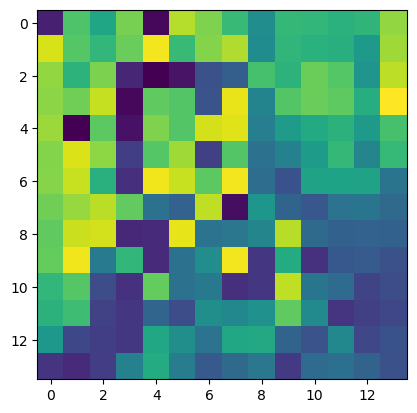

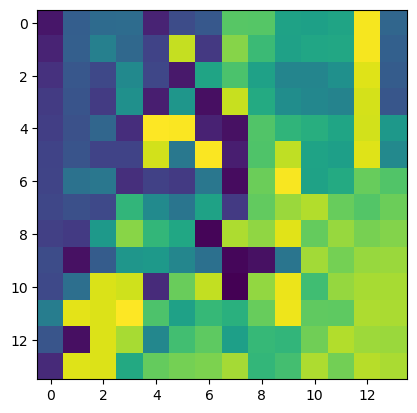

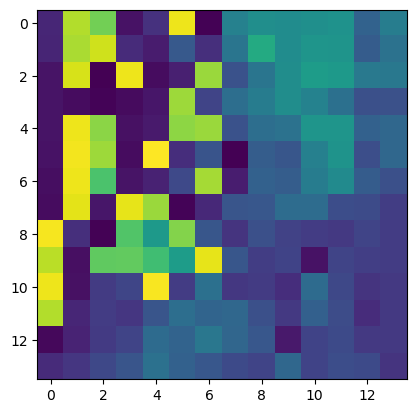

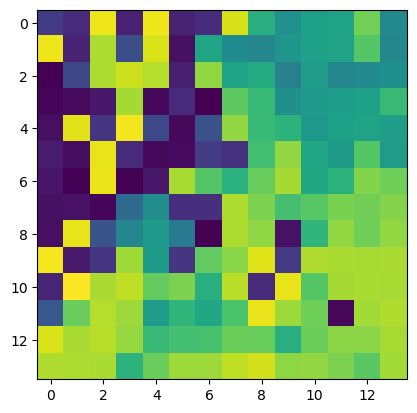

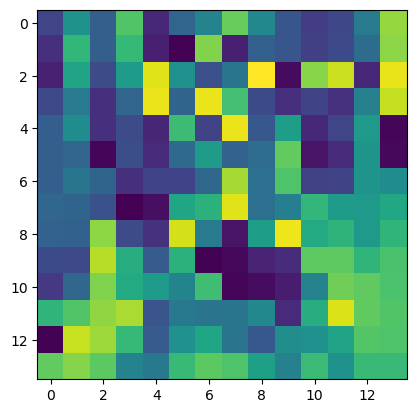

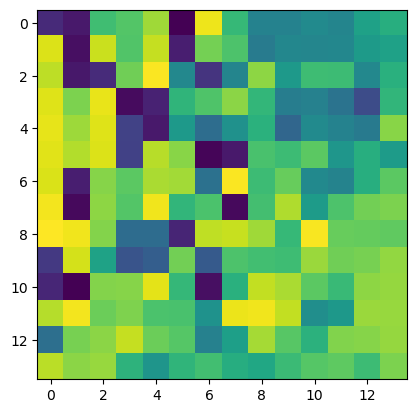

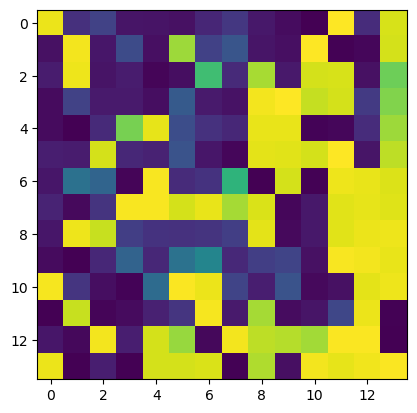

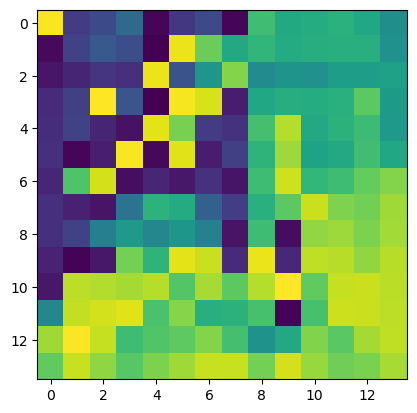

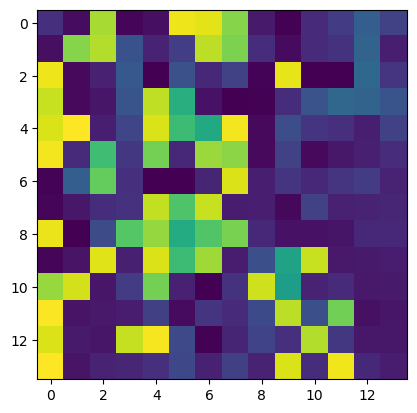

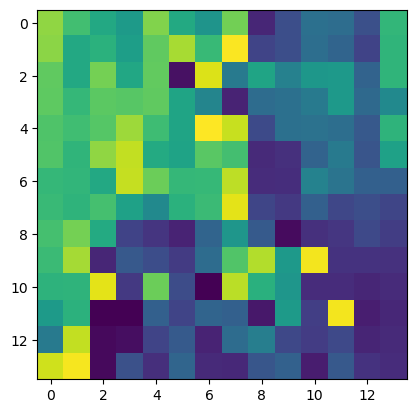

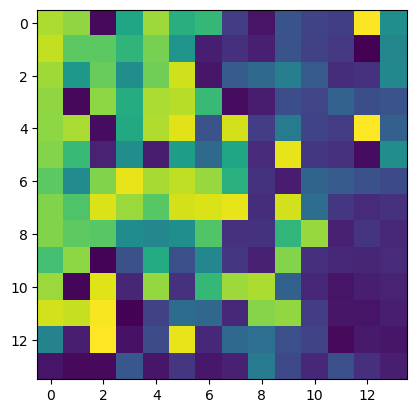

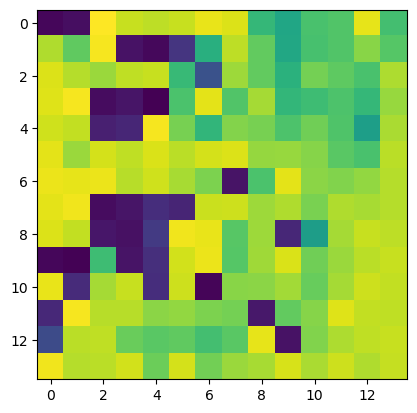

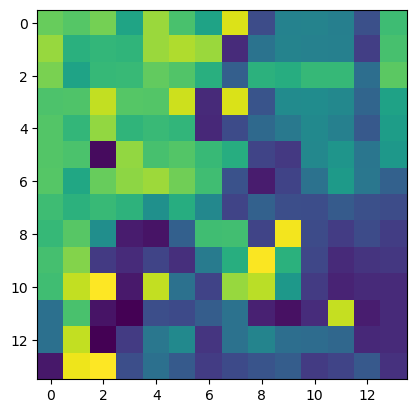

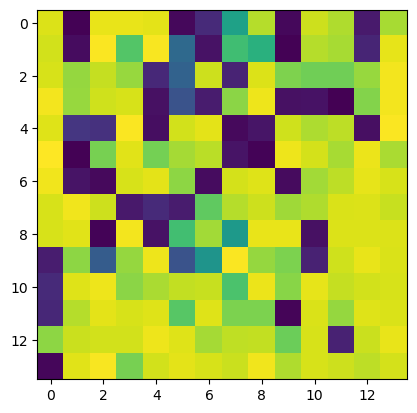

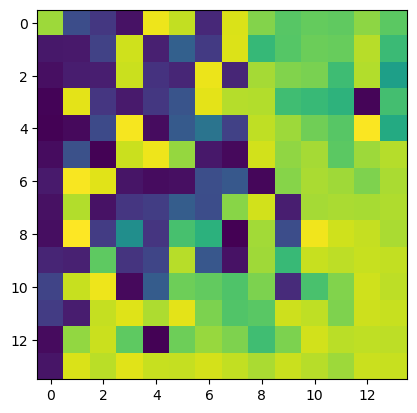

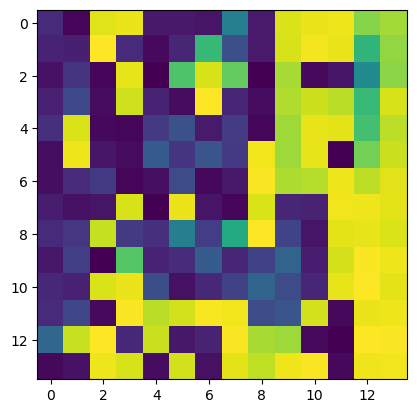

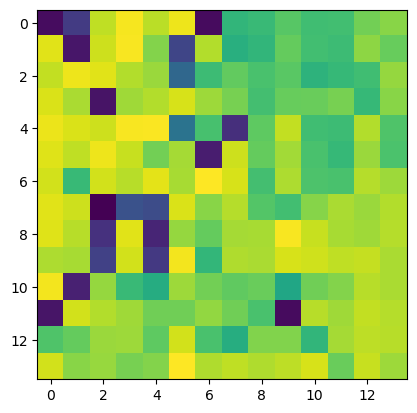

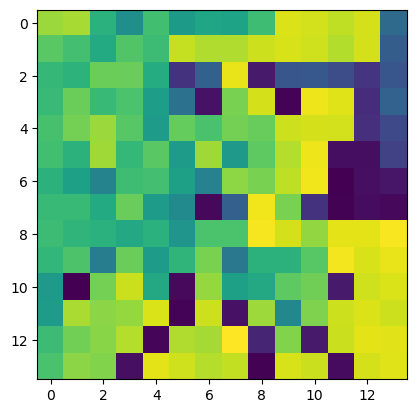

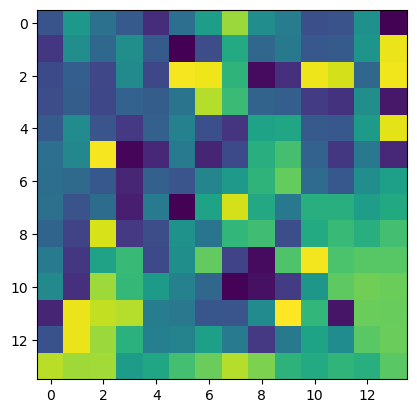

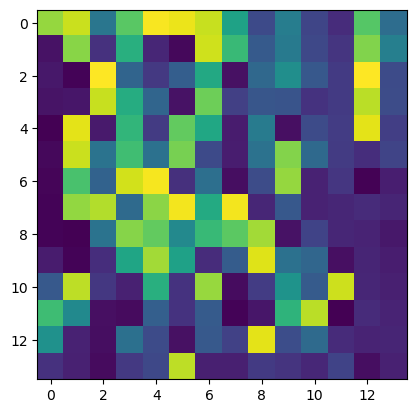

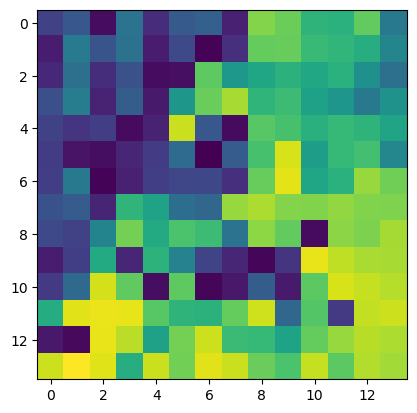

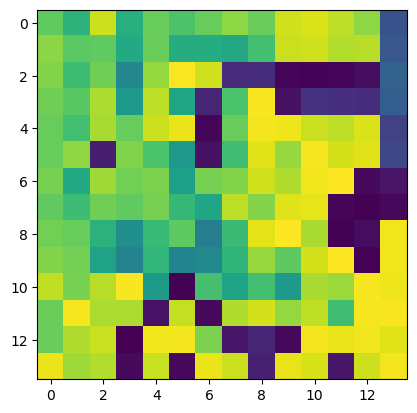

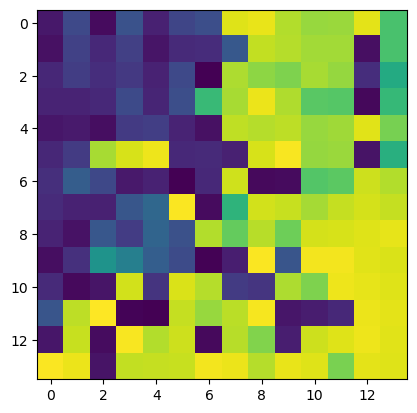

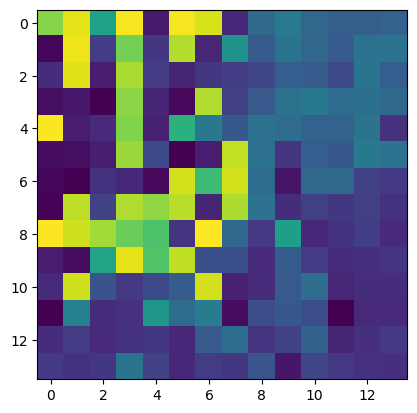

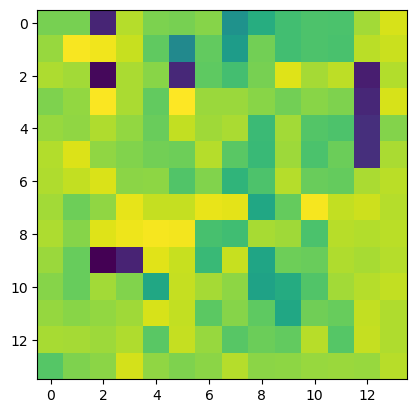

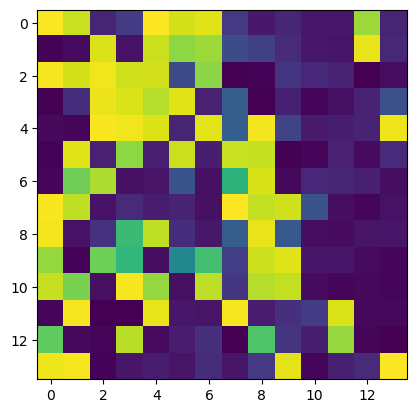

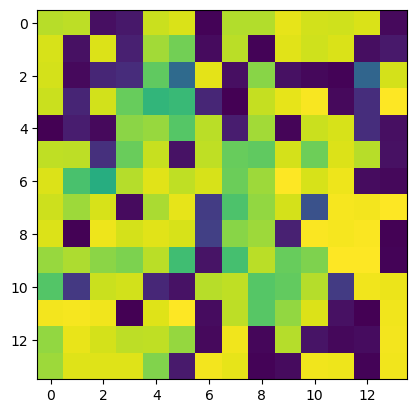

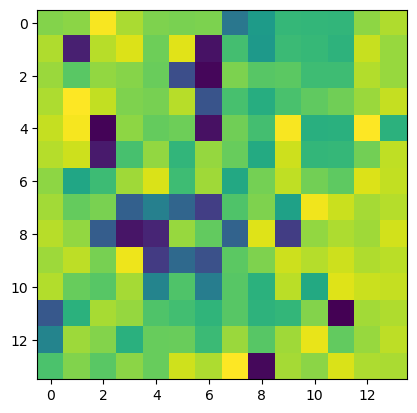

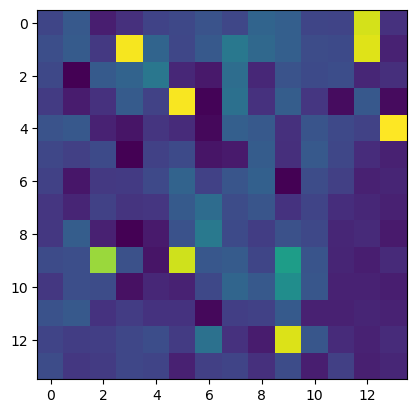

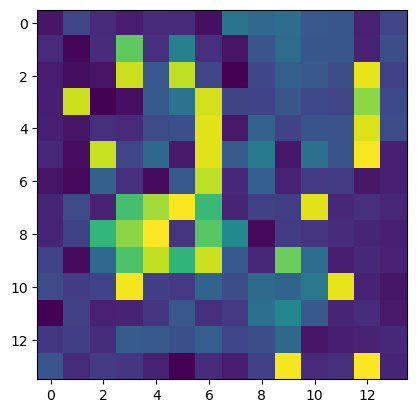

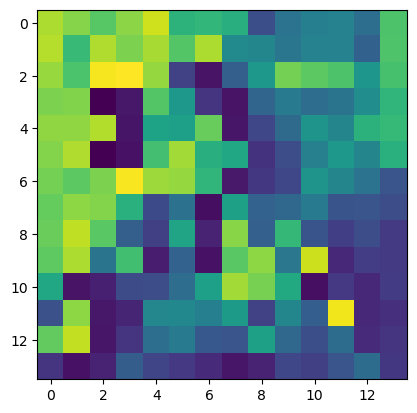

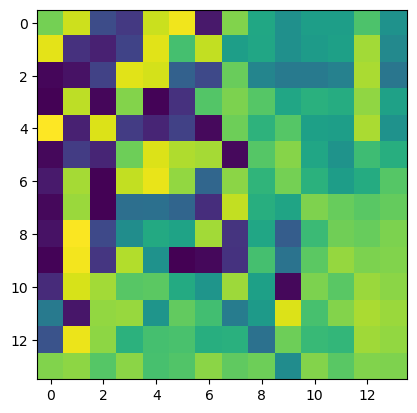

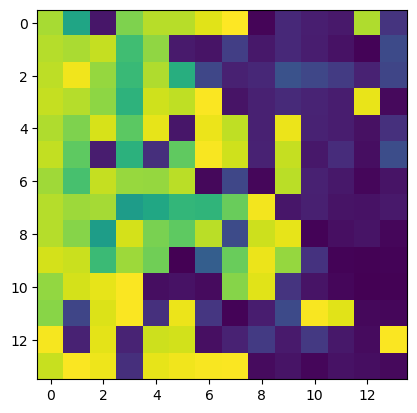

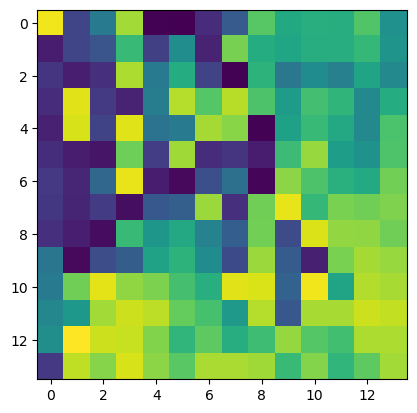

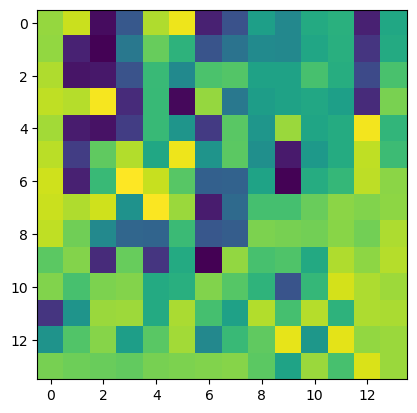

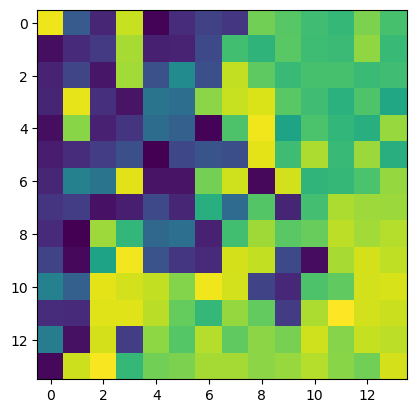

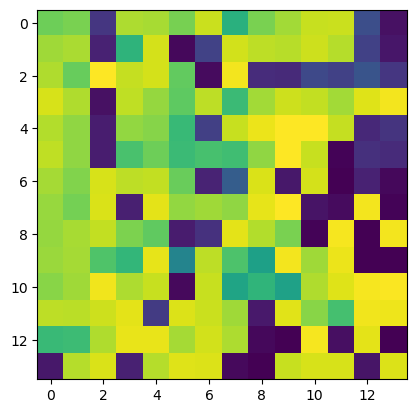

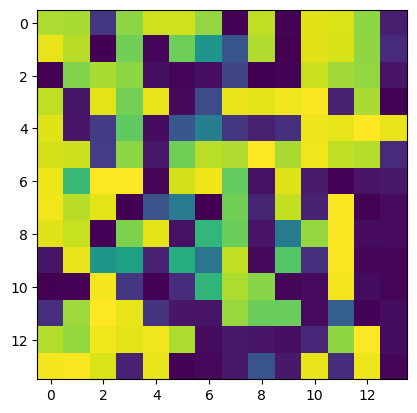

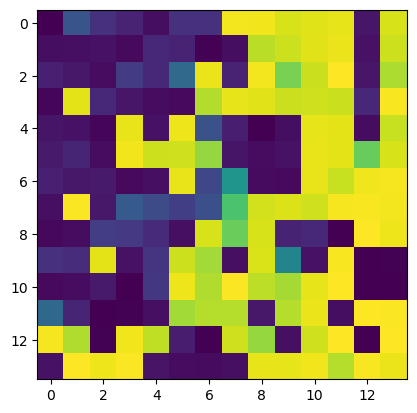

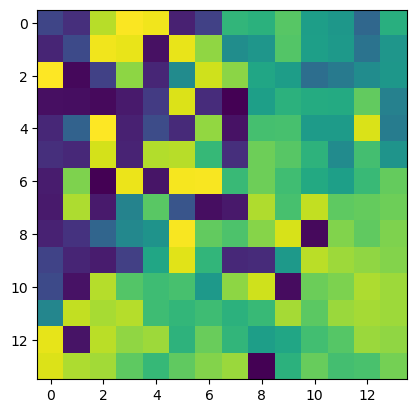

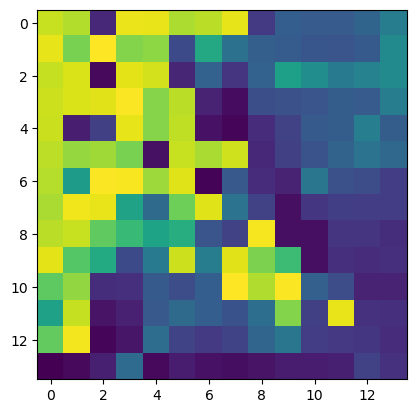

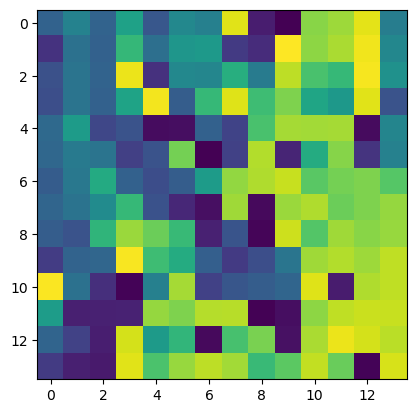

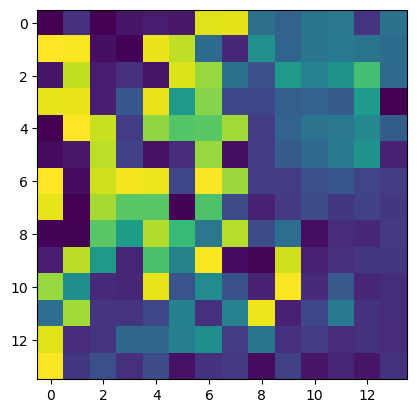

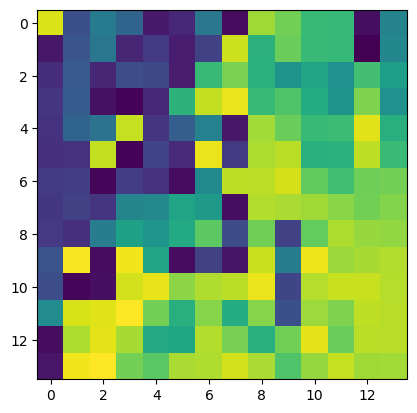

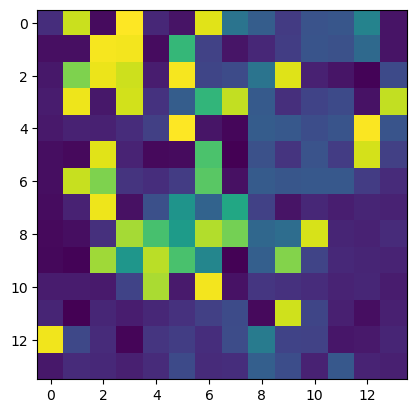

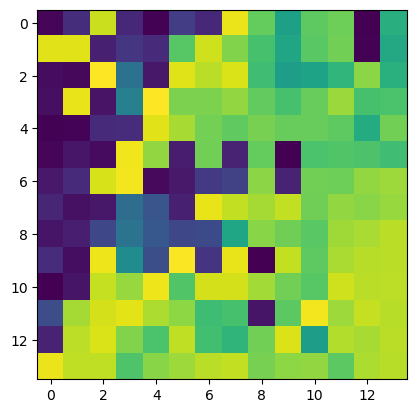

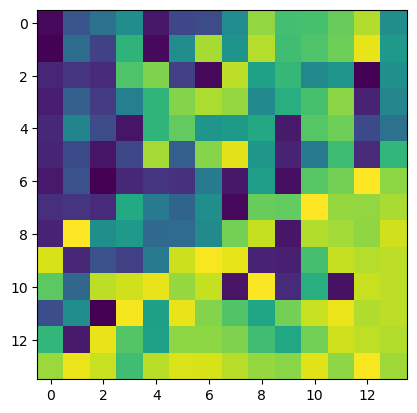

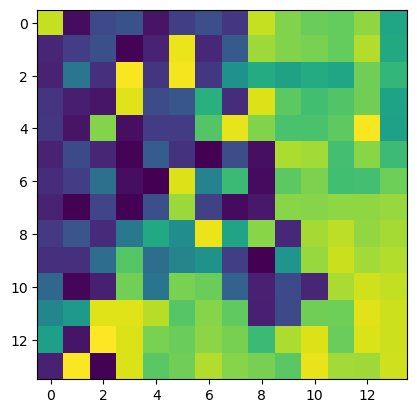

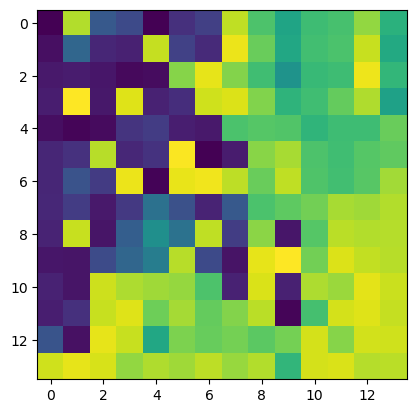

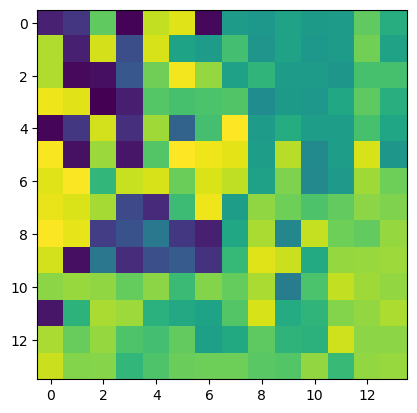

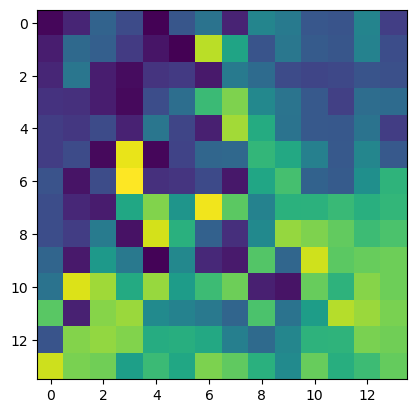

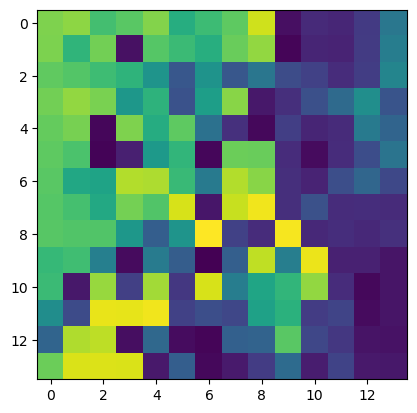

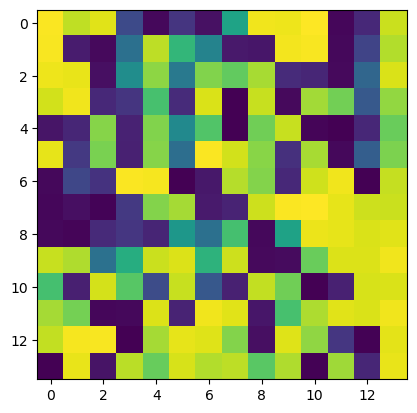

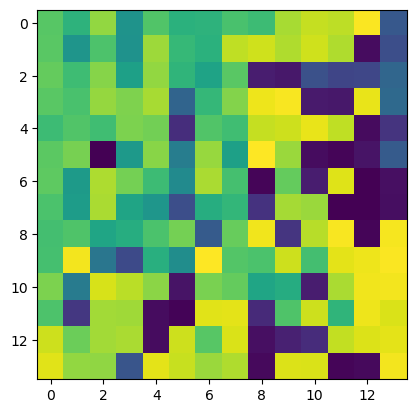

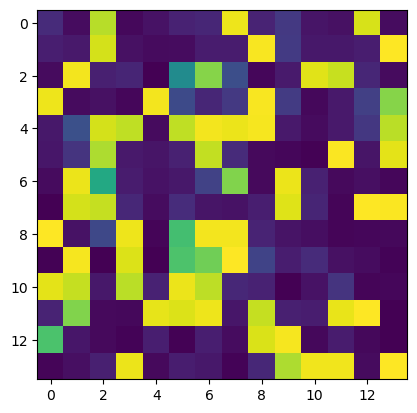

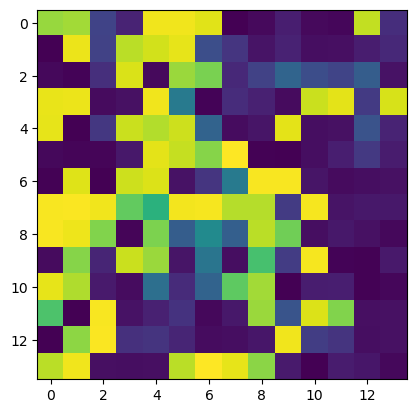

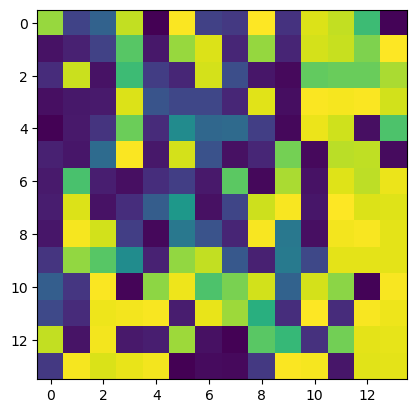

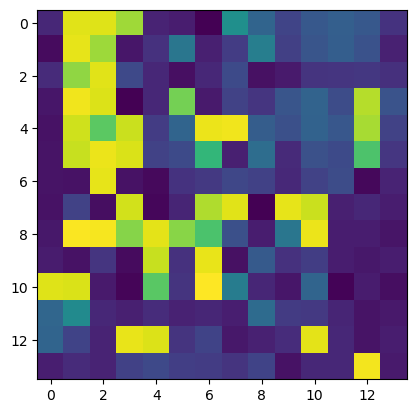

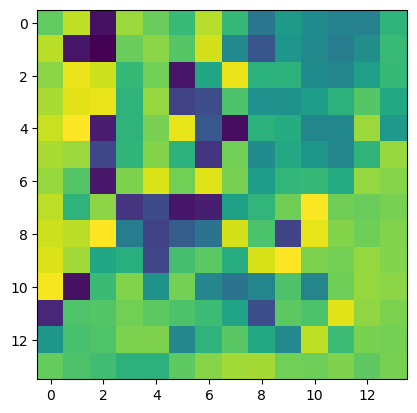

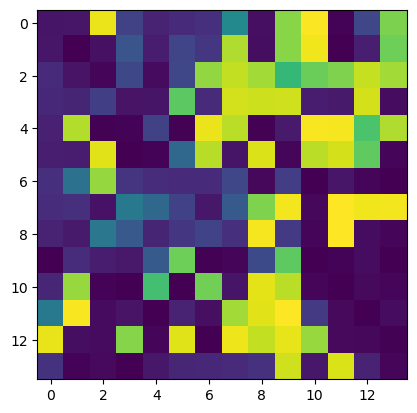

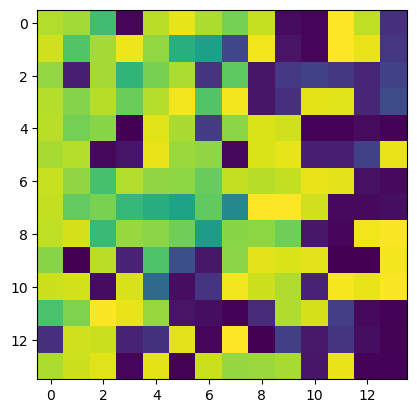

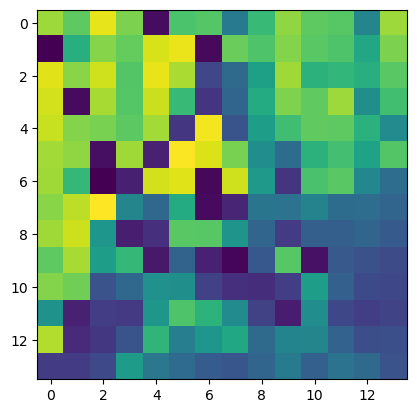

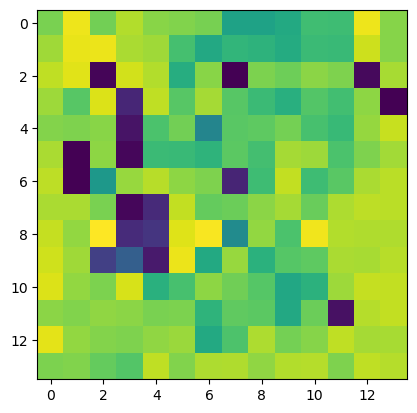

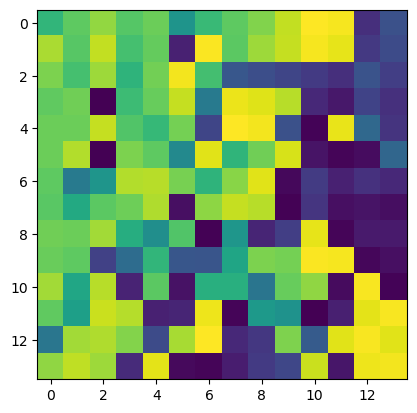

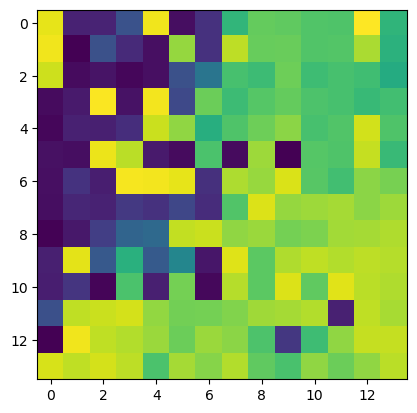

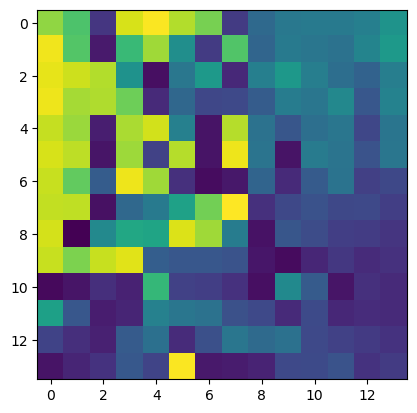

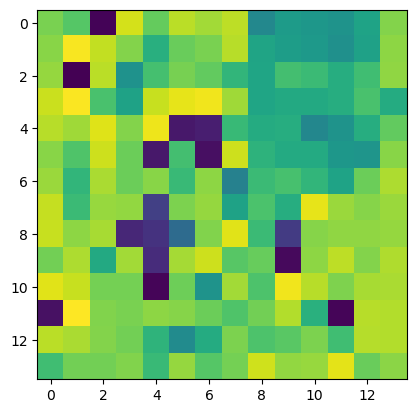

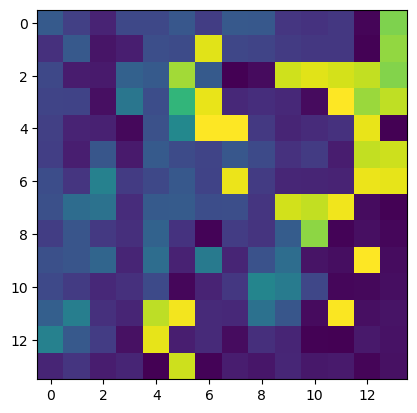

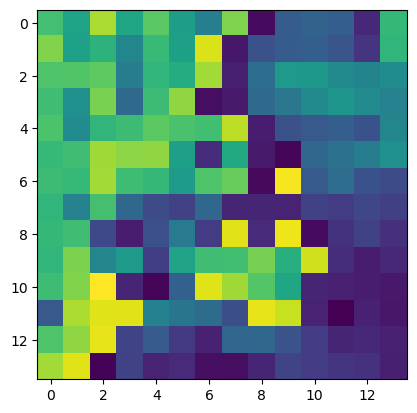

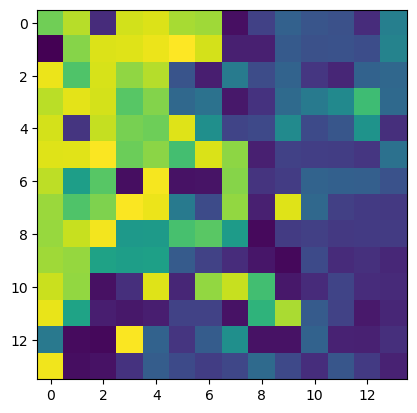

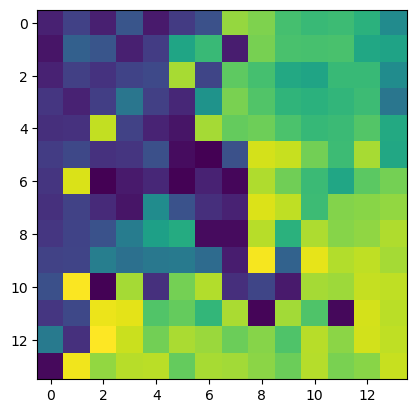

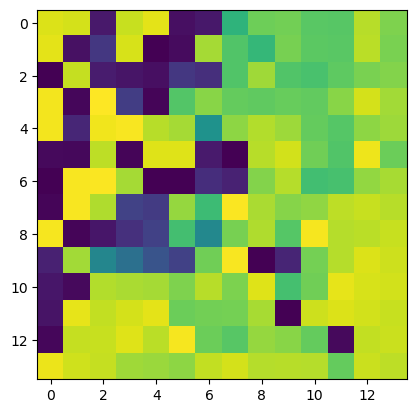

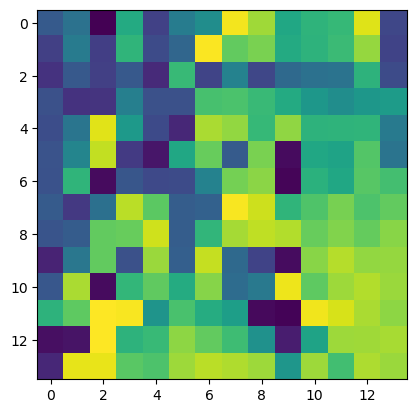

In [25]:
idx = 0
import torchvision

for idx in range(192):
    a1 = a[0,idx,:,:]
    img_final = torchvision.transforms.functional.to_pil_image(a1)
    plt.imshow(img_final)
    plt.show()

In [21]:
img_final = torchvision.transforms.functional.to_pil_image(a1)

In [19]:
a1

tensor([[ 1.6240e-01,  1.5992e-01,  6.8846e-02,  2.0913e-01,  6.4176e-02,
          2.2641e-01,  1.8998e-01, -2.3249e-01, -6.7912e-02, -2.8585e-03,
         -1.9976e-01, -2.1564e-01, -2.4216e-01, -3.0129e-01],
        [ 8.8956e-02,  2.2488e-01,  1.0675e-01,  2.2626e-01, -3.3066e-03,
         -1.2358e-01,  4.3724e-01, -4.9862e-02, -2.0944e-01, -7.6205e-03,
         -1.8396e-01, -1.8172e-01, -2.8622e-01, -2.7944e-01],
        [ 2.4093e-02,  2.4560e-01,  1.4701e-01,  8.2651e-02, -7.9006e-03,
          3.0723e-01, -7.0186e-01, -8.4529e-02, -1.2191e-01, -1.4246e-01,
         -2.7810e-01, -3.0780e-01, -3.6213e-01, -2.4714e-01],
        [ 1.0635e-01,  2.1002e-01,  8.8135e-02,  2.1547e-01,  2.9289e-02,
          3.5245e-01,  2.6661e-01, -1.1770e-01, -2.7188e-01, -1.3111e-01,
         -2.2000e-01, -2.7373e-01,  4.5348e-03, -4.5974e-01],
        [ 1.2271e-01,  3.0137e-01,  2.6403e-01,  1.1920e-01,  1.9555e-02,
         -2.3416e-01,  1.4033e-01,  2.6324e-01, -1.8444e-01, -8.7566e-02,
         -2.

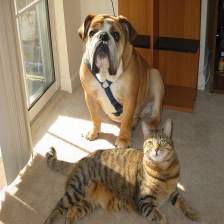

In [16]:
img

In [4]:
input_tensor  = preprocess_image("examples/input.png", transform)
# scores = model(input_tensor)


In [31]:
a = np.arange(16).resize(4,4)

In [32]:
a

In [27]:
torch.Tensor([])

torch.Tensor